## Исследование окупаемости рекламных вложений в приложение  

В распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года с информацией о посещениях сайта, о заказах и о расходах на рекламу развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования определить**
* откуда приходят пользователи и какими устройствами они пользуются
* сколько стоит привлечение пользователей из различных рекламных каналов
* сколько денег приносит каждый клиент
* когда расходы на привлечение клиента окупаются
* какие факторы мешают привлечению клиентов  

**Ход исследования**  

Данные о посещениях сайта я получу из датасета visits_info_short.csv, о заказах из датасета orders_info_short.csv и о расходах на рекламу из датасета costs_info_short.csv. О качестве данных ничего неизвестно, поэтому перед тем, как приступить к целям исследования, понадобится обзор и преобработка данных. Таким образом исследование пройдёт в 5 этапов:  
* Предобработка данных
* Исследовательский анализ данных
* Анализ маркетинговых показателей
* Оценка окупаемости рекламных вложений
* Написание общего вывода

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
#открываем датафреймы
try:
    visits, orders, costs = (pd.read_csv('/Users/tatanaryndina/Desktop/Анализ бизнес-показателей проект/visits_info_short.csv'),
                             pd.read_csv('/Users/tatanaryndina/Desktop/Анализ бизнес-показателей проект/orders_info_short.csv'),
                             pd.read_csv('/Users/tatanaryndina/Desktop/Анализ бизнес-показателей проект/costs_info_short.csv'))
except:
    visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                             pd.read_csv('/datasets/orders_info_short.csv'),
                             pd.read_csv('/datasets/costs_info_short.csv'))

In [3]:
#посмотрим на данные
display(visits.head(2))
display(orders.head(2))
display(costs.head(2))

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

## Предобработка данных

### Таблица visits:

In [4]:
#посмотрим на структуру данных
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
#пропусков нет, переведём данные в нужные форматы
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

In [6]:
#приведём данные все названия столбцов к нижнему регистру и избавимся от пробелов
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]

In [7]:
#проверим изменения
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
#проверим таблицу на наличие дубликатов
print(f'Количество явных дубликатов: {visits.duplicated().sum()}')
#и неявных
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())

Количество явных дубликатов: 0
['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


### Таблица orders:

In [9]:
#посмотрим на структуру данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
#пропусков нет, переведём данные в нужные форматы
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [11]:
#приведём данные все названия столбцов к нижнему регистру и избавимся от пробелов
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

In [12]:
#проверим изменения
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [13]:
#проверим таблицу на наличие дубликатов
print(f'Количество явных дубликатов: {orders.duplicated().sum()}')
#и неявных
print(orders['revenue'].unique())

Количество явных дубликатов: 0
[ 4.99  5.99  9.99 49.99 19.99]


### Таблица costs:

In [14]:
#посмотрим на структуру данных
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
#приведём данные все названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

In [16]:
#пропусков нет, переведём данные в нужные форматы
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [17]:
#проверим изменения
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
#проверим таблицу на наличие дубликатов
print(f'Количество явных дубликатов: {costs.duplicated().sum()}')
#и неявных
print(costs['channel'].unique())

Количество явных дубликатов: 0
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


**Выводы по предобработке данных:**  

Пропусков и дубликатов в данных не было обнаружено. Однако, потребовалось перевести все названия столбцов в "змеиный" регистр и привести данные в столбцах session_start, session_end, event_dt, к формату datetime и столбец dt сразу в формат date, так как в даннных отсутствует информация о времени 

В таблице **visits** хранится информация о пользовательских сессиях, 309901 строк.        

**Содержание данных:**  
* user_id — уникальный идентификатор пользователя   
* region - страна пользователя  
* channel — идентификатор рекламного источника  
* device — тип устройства пользователя  
* session_start — дата и время начала сессии  
* session_end — дата и время окончания сессии  


В таблице **orders** хранится информация о заказах с сайта, 40212 строк. 

**Содержание данных:**  
* user_id — уникальный идентификатор пользователя
* event_dt — дата и время покупки
* revenue — доход


В таблице **costs** хранится информация о затратах на маркетинг, 1800 строк.  

**Содержание данных:**  
* dt — дата
* сhannel — идентификатор рекламного источника
* сosts — затраты на этот рекламный источник
 

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания пользовательских профилей get_profiles**

In [19]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для расчета удержания get_retention**

In [20]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета удержания get_conversation**

In [21]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета LTV, ROI**

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функции для визуализации метрик**

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Визуализация удержания**

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Визуализация конверсии**

In [25]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Визуализация LTV и ROI**

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


### Создадим профили пользователей

Чтобы получить профили пользователей воспользуемся функцией get_profiles. Однако, чтобы восполнить недостающий элемент с событиями events, создадим его пустым самостоятельно.

In [27]:
#создадим пустой элемент с событиями
events=None 

#получим профили пользователей
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head())

#посчитаем количество профилей пользователей
print('Количество профилей:', len(profiles))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Количество профилей: 150008


In [28]:
#найдем минимальную и максимальную дату привлечения пользователей
print('Минимальная дата привлечения пользователей', profiles['dt'].min())
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


**Вывод:** теперь у нас есть 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, по каждой когорте за период привлечения с 1 мая 2019 по 27 октября 2019 г.

### Анализ пользователей в разрезе стран

In [29]:
#сгруппируем профили пользователей по региону и рассчитаем количество уникальных и платящих пользователей
profiles_region = (profiles.groupby('region')['user_id', 'payer'].agg({'user_id': 'count', 'payer':'sum'}).reset_index())
profiles_region['%_region'] = round(profiles_region['user_id'] / profiles_region['user_id'].sum() *100, 2)
profiles_region['%_payers'] = round(profiles_region['payer'] / profiles_region['user_id'] *100, 2)
profiles_region.sort_values(by='payer', ascending=False)

region  user_id  payer  %_region  %_payers
3  United States   100002   6902     66.66      6.90
2             UK    17575    700     11.72      3.98
0         France    17450    663     11.63      3.80
1        Germany    14981    616      9.99      4.11

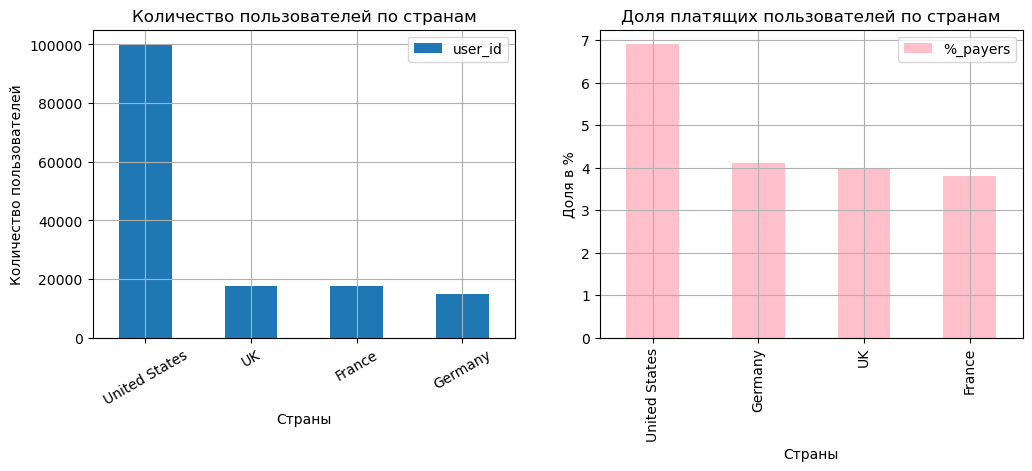

In [30]:
#визуализируем результат на графике
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
profiles_region.sort_values(by='user_id', ascending=False).plot.bar(x='region', y=['user_id'], grid=True,
          title='Количество пользователей по странам', rot=30, ax=ax1).set(xlabel='Страны', 
          ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_region.sort_values(by='%_payers', ascending=False).plot.bar(x='region', y=['%_payers'], grid=True,
          title='Доля платящих пользователей по странам', color='pink',ax=ax2).set(xlabel='Страны', 
          ylabel='Доля в %')

plt.show()

**Вывод:** больше половины пользователей из США, оставшаяся доля распределяется почти равномерно среди пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше всего в США: почти 7% в отличии от примерно 4% у других стран.

### Анализ устройств пользователей

In [31]:
#сгруппируем профили пользователей по устройству и рассчитаем количество уникальных и платящих пользователей
profiles_device = (profiles.groupby('device')['user_id', 'payer'].agg({'user_id': 'count', 'payer':'sum'}).reset_index())
profiles_device['%_payers'] = round(profiles_device['payer'] / profiles_device['user_id'] * 100, 2)
profiles_device.sort_values(by='payer', ascending=False)

device  user_id  payer  %_payers
3   iPhone    54479   3382      6.21
0  Android    35032   2050      5.85
1      Mac    30042   1912      6.36
2       PC    30455   1537      5.05

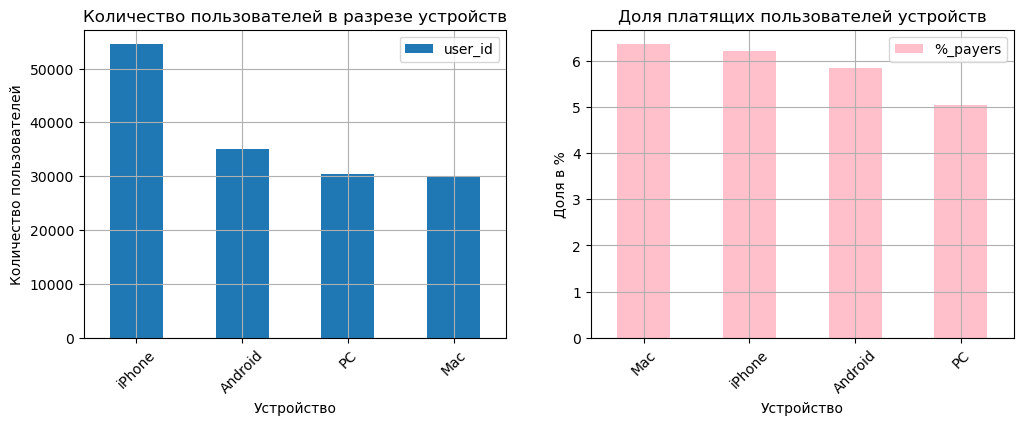

In [32]:
#визуализируем результат на графике
plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
profiles_device.sort_values(by='user_id', ascending=False).plot.bar(x='device', y=['user_id'], grid=True,
    title='Количество пользователей в разрезе устройств', ax=ax1).set(xlabel='Устройство', ylabel='Количество пользователей')
plt.xticks(rotation=45)

ax2 = plt.subplot(1, 2, 2)
profiles_device.sort_values(by='%_payers', ascending=False).plot.bar(x='device', y=['%_payers'], grid=True,
    title='Доля платящих пользователей устройств', color='pink', ax=ax2).set(xlabel='Устройство', ylabel='Доля в %')
plt.xticks(rotation=45)

plt.show()

**Вывод:** больше всего пользователей заходят на наш сайт с устройства iPhone (их почти 6000) это логично коррелируется с тем, что из США большинство наших пользователей. По остальным устройствам Android, PC, Mac приходится 3000-3500 соответственно. А вот доля платящих пользователей самая большая у пользователей Mac (5-6,2%), хотя и среди пользователей iPhone также достаточно высокий доказатель платящих.

### Анализ рекламных каналов привлечения пользователей

In [33]:
#сгруппируем профили пользователей по рекламному источнику и рассчитаем количество уникальных и платящих пользователей
profiles_channel = (profiles.groupby('channel')['user_id', 'payer'].agg({'user_id': 'count', 'payer':'sum'}).reset_index())
# % пользователей каждого канала 
profiles_channel['%_users'] = round(profiles_channel['user_id'] / profiles_channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
profiles_channel['%_payers'] = round(profiles_channel['payer'] / profiles_channel['user_id'] * 100, 2)

profiles_channel.sort_values(by='user_id', ascending=False)

channel  user_id  payer  %_users  %_payers
10             organic    56439   1160    37.62      2.06
1             FaceBoom    29144   3557    19.43     12.20
6               TipTop    19561   1878    13.04      9.60
4   OppleCreativeMedia     8605    233     5.74      2.71
2              LeapBob     8553    262     5.70      3.06
7       WahooNetBanner     8553    453     5.70      5.30
5       RocketSuperAds     4448    352     2.97      7.91
3         MediaTornado     4364    156     2.91      3.57
8              YRabbit     4312    165     2.87      3.83
0           AdNonSense     3880    440     2.59     11.34
9       lambdaMediaAds     2149    225     1.43     10.47

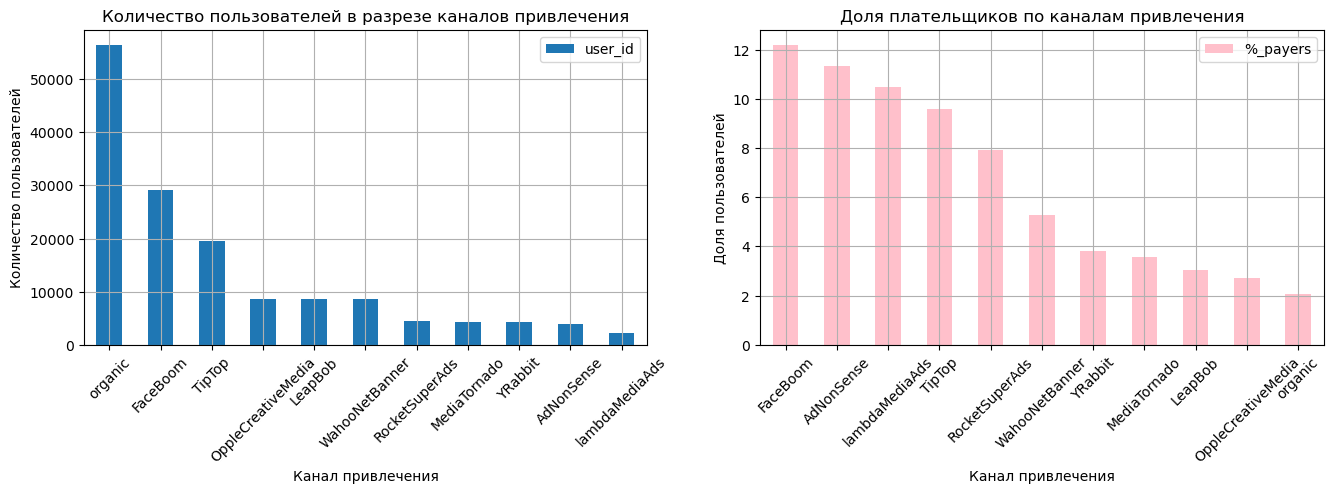

In [34]:
#визуализируем результат на графике
plt.figure(figsize=(16, 9))

ax1 = plt.subplot(2, 2, 1)
profiles_channel.sort_values(by='user_id', ascending=False).plot.bar(x='channel', y=['user_id'],grid=True,
     title='Количество пользователей в разрезе каналов привлечения', ax=ax1).set(xlabel='Канал привлечения', 
     ylabel='Количество пользователей')
plt.xticks(rotation=45)

ax2 = plt.subplot(2, 2, 2)
profiles_channel.sort_values(by='%_payers', ascending=False).plot.bar(x='channel', y=['%_payers'], grid=True,
    title='Доля плательщиков по каналам привлечения', color='pink', ax=ax2).set(xlabel='Канал привлечения', 
    ylabel='Доля пользователей')
plt.xticks(rotation=45)

plt.show()

**Вывод:** больше всего пользователей (56.000) органические, то есть приходят самостоятельно, однако доля платящих среди них ожидаемо самая низкая (около 2%), так как их не привлекали целенаправленно. Далее в рейтинге идут самые крупные рекламные источники FaceBoom и TipTop, они дают 50% пользователей. Что касается доли платящих пользователей, лидирует FaceBoom (12.2%) и на червёртом месте TipTop(9.6%), а также два непопулярных рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%). 

## Вывод по разделу

Мы получили **150008 уникальных профилей** пользователей за период привлечения с 1 мая 2019 по 27 октября 2019 г. **Больше половины пользователей из США**(платящих 7%), оставшаяся доля распределяется почти равномерно среди пользователей Великобритании, Франции и Германии(платящих примерно по 4% соответственно).

**Самое популярное устройство для входа среди пользователей - iPhone** (их почти 6000) это логично коррелируется с тем, что из США большинство наших пользователей. По остальным устройствам Android, PC, Mac приходится 3000-3500 соответственно. А вот доля платящих пользователей самая большая у пользователей Mac (5-6,2%), хотя и среди пользователей iPhone также достаточно высокий доказатель платящих.

**Больше всего пользователей (56.000) органические**, то есть приходят самостоятельно, однако доля платящих среди них ожидаемо самая низкая (около 2%), так как их не привлекали целенаправленно. Среди рекламных источников **FaceBoom и TipTop привели 50% пользователей**. Что касается доли платящих пользователей, лидирует FaceBoom (12.2%) и на червёртом месте TipTop(9.6%), а также два непопулярных рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%).

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.


### Общая сумма расходов на маркетинг

In [35]:
round(costs['costs'].sum())

105497

**Вывод:** общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 у.е. 

### Распределение расходов на рекламу по источникам

In [36]:
#сгруппируем профили пользователей по рекламному источнику и посчитаем расходы
profiles_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
profiles_costs['%'] =round((profiles_costs['costs'] / profiles_costs['costs'].sum())*100, 2)
profiles_costs

costs      %
channel                            
TipTop              54751.30  51.90
FaceBoom            32445.60  30.75
WahooNetBanner       5151.00   4.88
AdNonSense           3911.25   3.71
OppleCreativeMedia   2151.25   2.04
RocketSuperAds       1833.00   1.74
LeapBob              1797.60   1.70
lambdaMediaAds       1557.60   1.48
MediaTornado          954.48   0.90
YRabbit               944.22   0.90

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'TipTop'),
  Text(1, 0, 'FaceBoom'),
  Text(2, 0, 'WahooNetBanner'),
  Text(3, 0, 'AdNonSense'),
  Text(4, 0, 'OppleCreativeMedia'),
  Text(5, 0, 'RocketSuperAds'),
  Text(6, 0, 'LeapBob'),
  Text(7, 0, 'lambdaMediaAds'),
  Text(8, 0, 'MediaTornado'),
  Text(9, 0, 'YRabbit')])

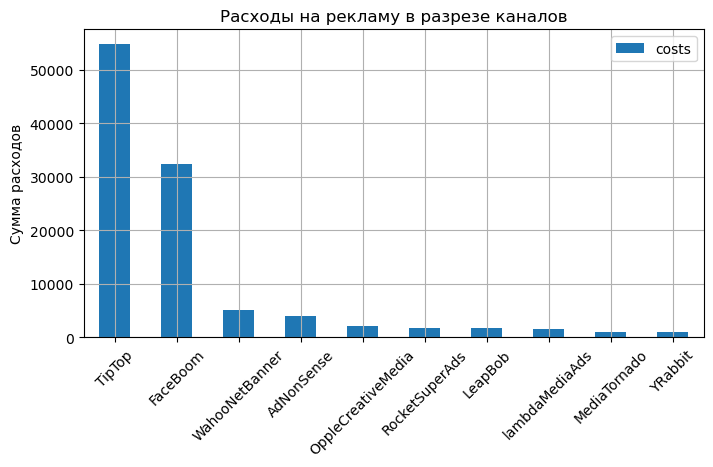

In [37]:
#визуализируем результат на графике
profiles_costs.plot.bar(y='costs', grid=True, title='Расходы на рекламу в разрезе каналов',
                         figsize=(8,4)).set(ylabel='Сумма расходов', xlabel='')
plt.xticks(rotation=45)

**Вывод:** основная доля расходов приходится на рекламные каналы TipTop (51.9%) и FaceBoom (30.75%).

### Динамика расходов в разрезе каналов привлечения

In [38]:
#построим сводную таблицу с группировкой по каналам привлечения
pivot_channel = costs.reset_index().pivot_table(index='dt', columns = 'channel',values = 'costs', aggfunc = 'sum')
pivot_channel.head()

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01       40.95     113.3     2.52          6.24                4.25   
2019-05-02       34.65      78.1     2.94          5.04                4.25   
2019-05-03       47.25      85.8     2.73          6.96                5.75   
2019-05-04       51.45     136.4     3.99          9.36                4.25   
2019-05-05       36.75     122.1     4.62         11.04                5.50   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
dt                                                                           
2019-05-01          21.060    80.0            10.8      8.1            17.6  
2019-05-02          16.965    55.0             7.2      9.9            16.8  
2019-05-03          16.380    64.0             8.4      9.0            16.8  
2019-05-04          17.550    70.0            10.8     15.6            17.6  
2019-05-05          27.495    78.0            12.0      9.6            12.8

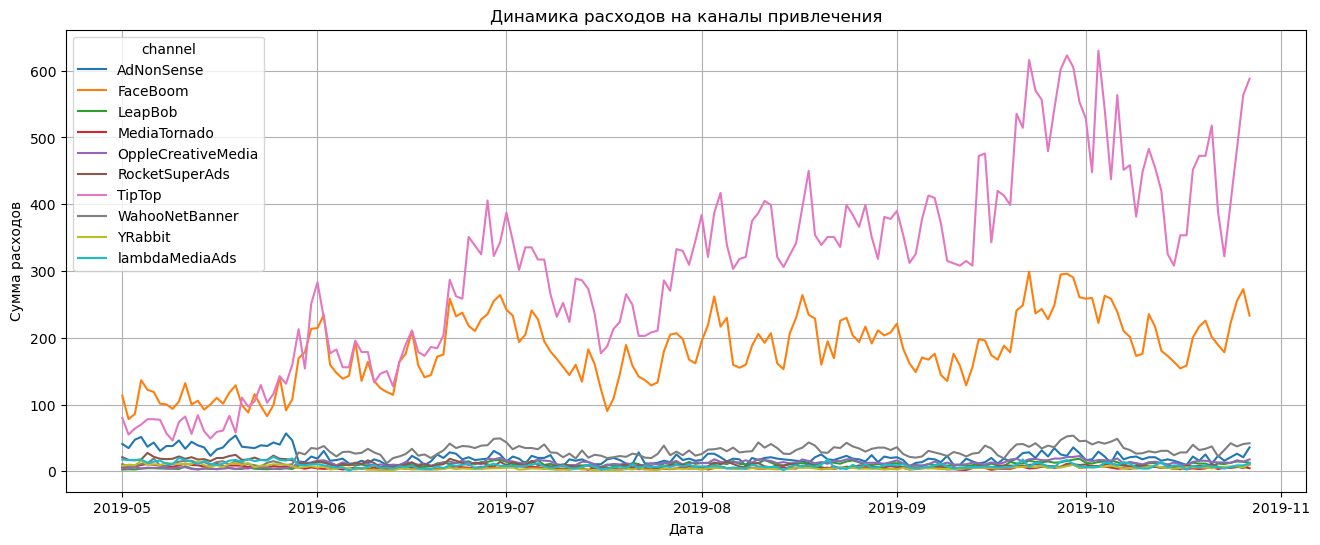

In [39]:
#график динамики расходов по месяцам
pivot_channel.plot(grid=True, figsize=(16, 6), title = 'Динамика расходов на каналы привлечения').set(
                   xlabel = 'Дата', ylabel = 'Сумма расходов');

In [40]:
#выделим месяц и номер недели из даты
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month
costs['week'] = costs['dt'].astype('datetime64[W]').dt.week

In [41]:
#построим сводную таблицу с группировкой по каналам привлечения по месяцам
pivot_channel_month = costs.reset_index().pivot_table(index='month', columns = 'channel',values = 'costs', aggfunc = 'sum')
pivot_channel_month.head()

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2

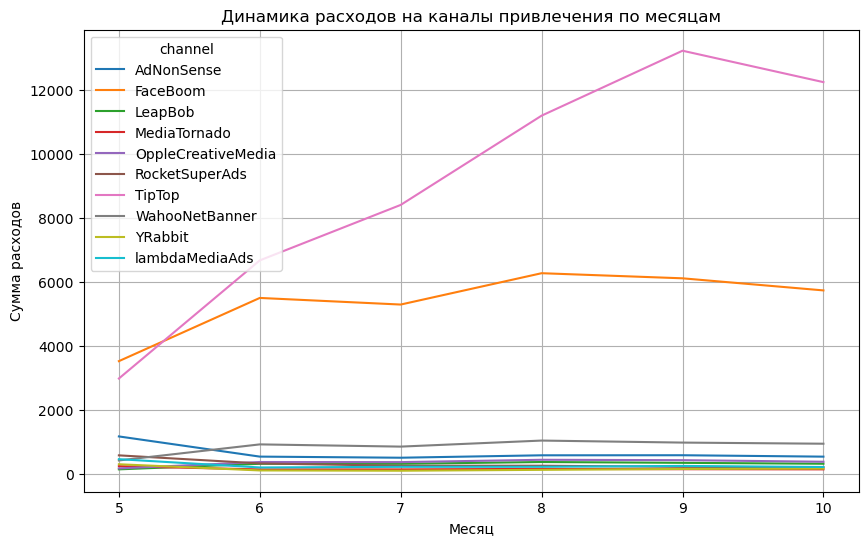

In [42]:
#график динамики расходов по месяцам
pivot_channel_month.plot(grid=True, figsize=(10, 6), title = 'Динамика расходов на каналы привлечения по месяцам').set(
                   xlabel = 'Месяц', ylabel = 'Сумма расходов');

In [43]:
#построим сводную таблицу с группировкой по каналам привлечения по неделям
pivot_channel_week = costs.reset_index().pivot_table(index='week', columns = 'channel',values = 'costs', aggfunc = 'sum')
pivot_channel_week.head()

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
17            40.95     113.3     2.52          6.24                4.25   
18           281.40     742.5    27.09         57.60               34.75   
19           259.35     728.2    29.61         59.76               31.00   
20           275.10     760.1    28.98         58.80               31.00   
21           277.20     788.7    30.45         46.56               44.00   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
17               21.060    80.0            10.8      8.1            17.6  
18              136.890   479.0            73.8     76.5           105.6  
19              131.625   451.0            93.0     74.1            98.4  
20              142.155   572.6            85.8     66.6           101.6  
21              122.850   993.7            95.4     60.0           116.0

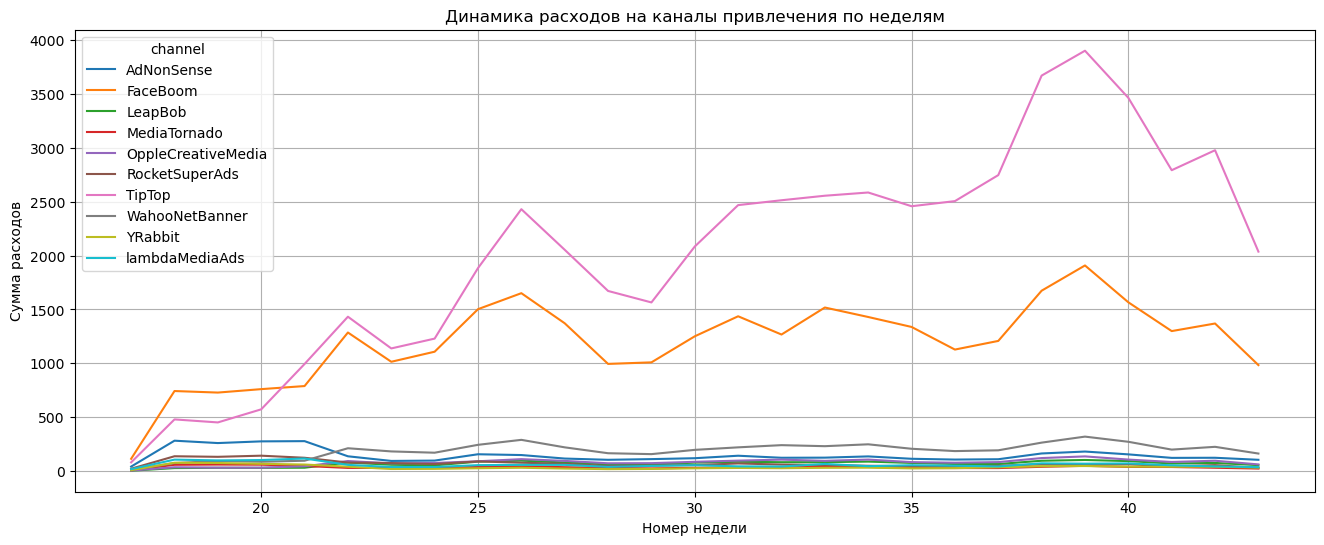

In [44]:
#график динамики расходов по неделям
pivot_channel_week.plot(grid=True, figsize=(16, 6), title = 'Динамика расходов на каналы привлечения по неделям').set(
                   xlabel = 'Номер недели', ylabel = 'Сумма расходов');

**Вывод:** в динамике по месяцам и по неделям можно заметить рост вложений в течение всего исследуемого периода по каналам TipTop и FaceBoom, тогда как затраты на остальные каналы привлечения остаются стабильными, при этом в абсолюте гораздо ниже.

### Средняя стоимость привлечения одного покупателя

Так как нас интересует именно стоимость привлечения одного покупателя, мы исключим из расчёта "органических" пользователей, так как на их привлечение компания не тратила средств (разве что косвенно).

In [45]:
#посчитаем среднее по всем каналам, исключив organic
print('Средняя стоимость привлечения одного пользователя:', 
      round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

Средняя стоимость привлечения одного пользователя: 1.13


In [46]:
#сгруппируем профили пользователей по каналам привлечения и посчитаем средний САС по каждому каналу
mean_cost_of_channel = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
display(mean_cost_of_channel)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

**Вывод:** так как средняя стоимость привлечения одного пользователя 1.13, то её больше чем в 2 раза превысил TipTop (2,8 у.е.) и почти достигли FaceBoom (1,11 у.е.) и AdNonSense (1,0 у.е.). **Будем считать TipTop самым дорогим каналом привлечения.** Однако количество и доля платящих пользователей, приходящих из этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью.

## Вывод по разделу

Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила **105497 у.е.** распределившись между **TipTop (51.9%), FaceBoom (30.75%) и остальные каналы (17.35%).**

В динамике по месяцам и по неделям можно заметить **рост вложений** в течение всего исследуемого периода всё по тем же каналам **TipTop и FaceBoom**, тогда как затраты на остальные каналы привлечения остаются стабильными, при этом в абсолюте гораздо ниже.

**Средняя стоимость привлечения одного пользователя: 1.13**, а так как TipTop превысил её более чем в 2 раза, будем считать TipTop самым дорогим каналом привлечения. Однако количество и доля платящих пользователей, приходящих из этого источника, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью. FaceBoom (1,11 у.е.) и AdNonSense (1,0 у.е.) максимально приближены к средней. 

## Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

In [47]:
#установим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14

#для корректности расчётов исключим органических пользователей
profiles = profiles.query('channel != "organic"')

### Общая окупаемость рекламы

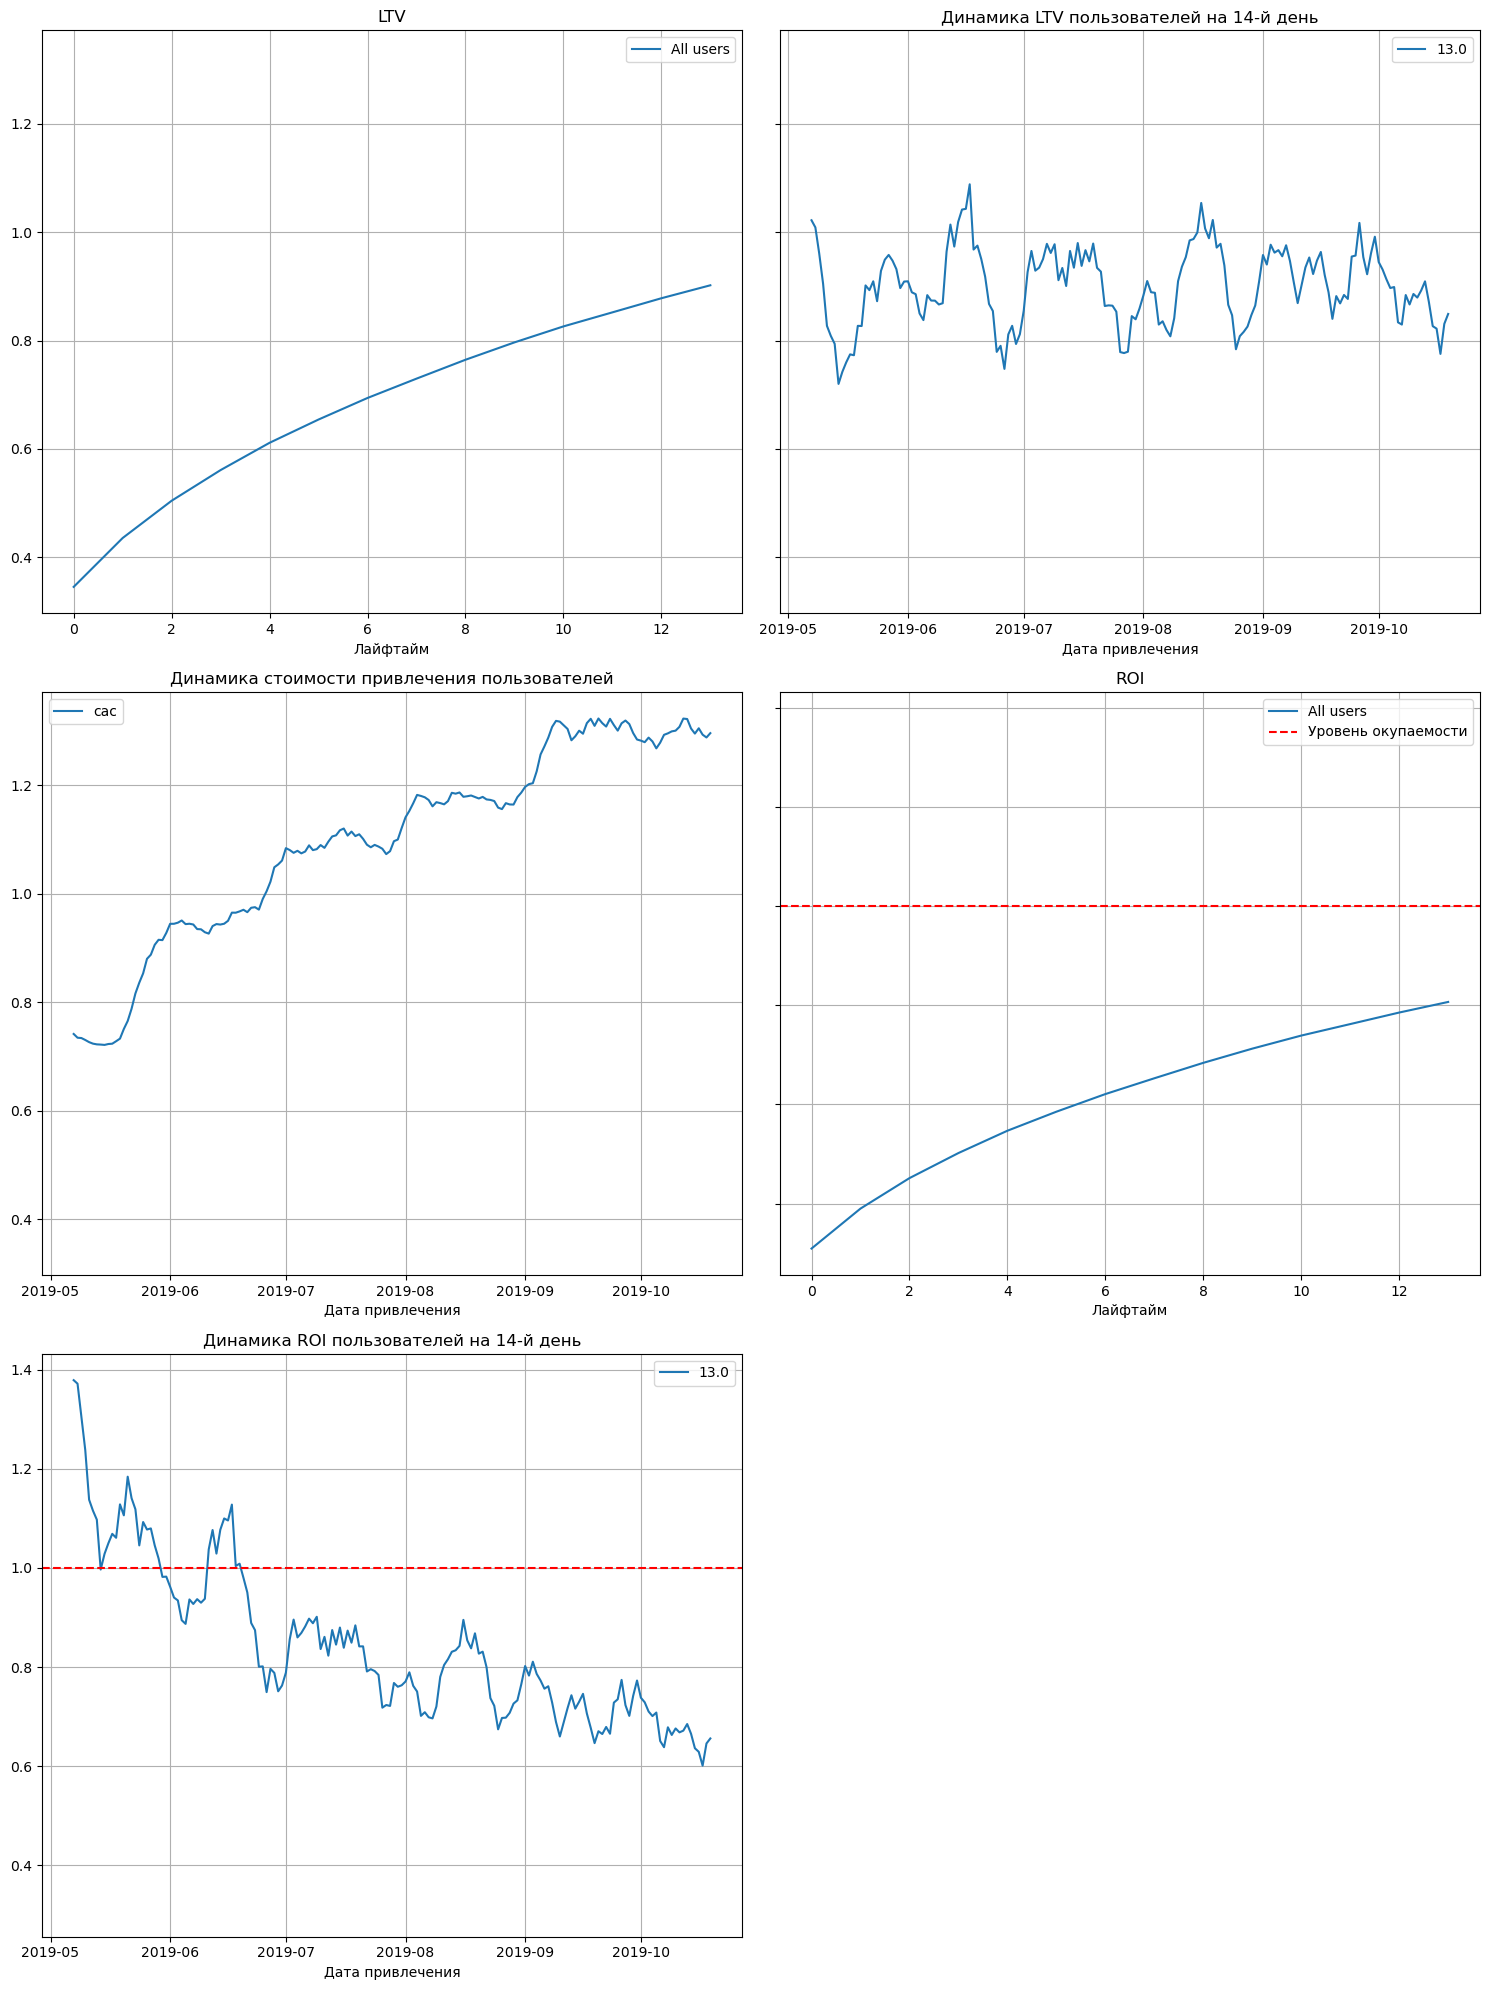

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:** по графикам можно выделить, что динамика LTV стабильна, а расходы по привлечению постоянно растут, в связи с этим окупаемость снизилась и с середины июня ROI опустился ниже предельного уровня - это проблема. Реклама не окупается к концу второй недели и достигает только 80%, что негативно сказывается на прибыли компании. Динамика САС растёт с мая по конец октября. Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.

### Конверсия и удержание пользователей в динамике

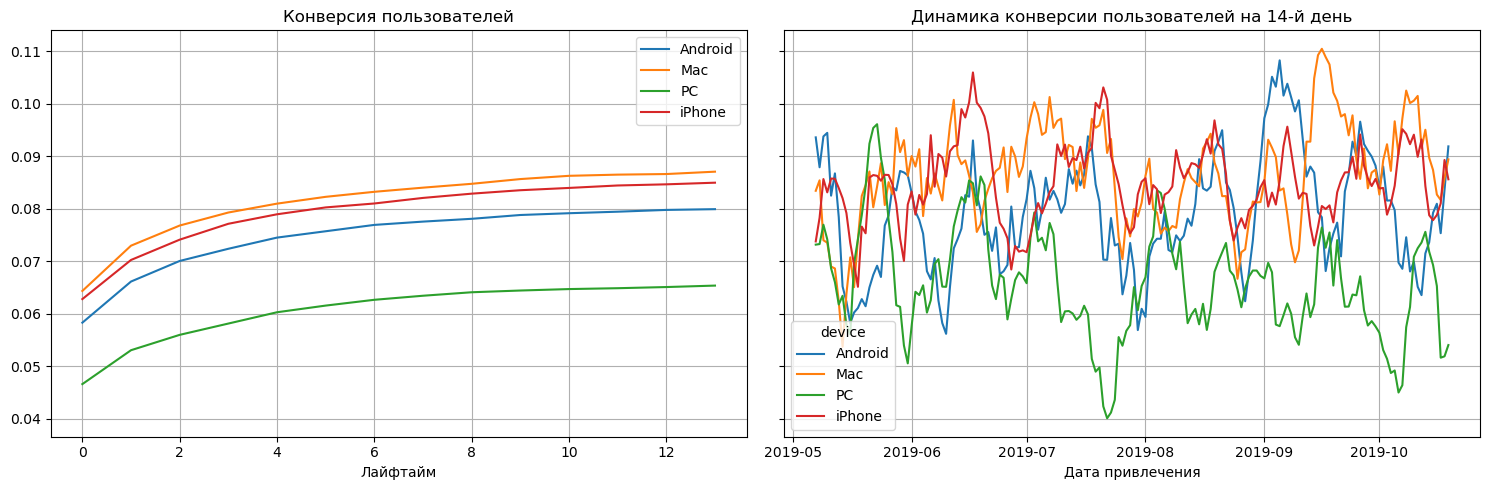

In [49]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** судя по графикам, iPhone и Mac держат хорошую и стабильную конверсию, а вот пользователи PC конвертируются ощутимо меньше.

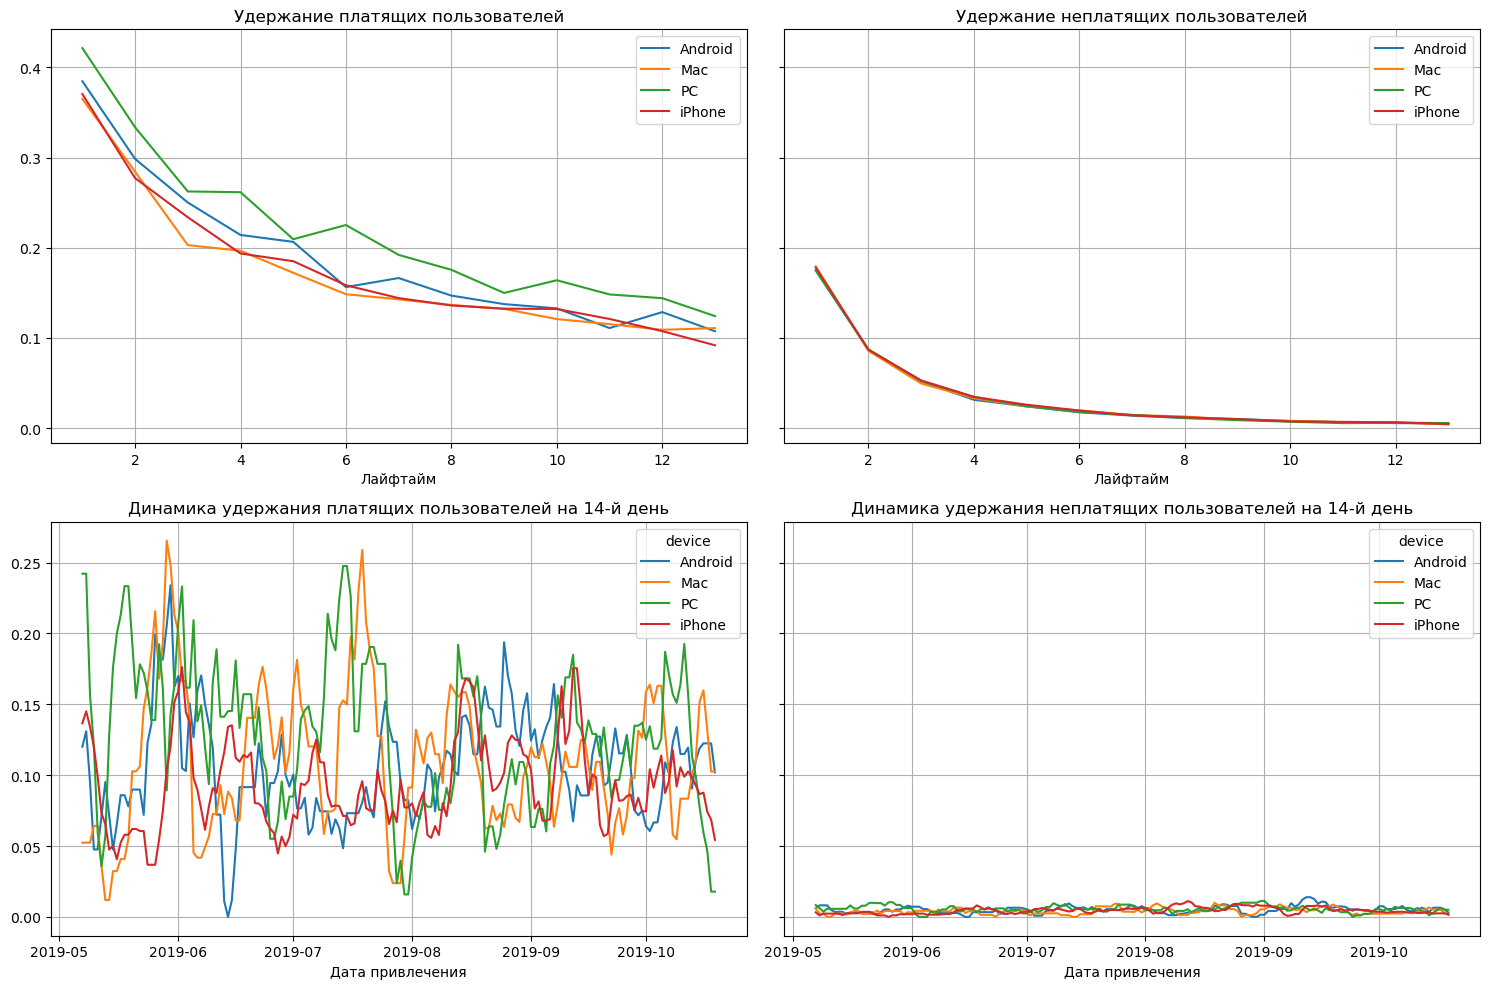

In [50]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** что интересно, при самой низкой конверсии у пользователей РС, у них же самое высокое удержание платящих пользователей. То есть скорее всего они более лояльные, хоть их и количественно меньше.

**По странам:**

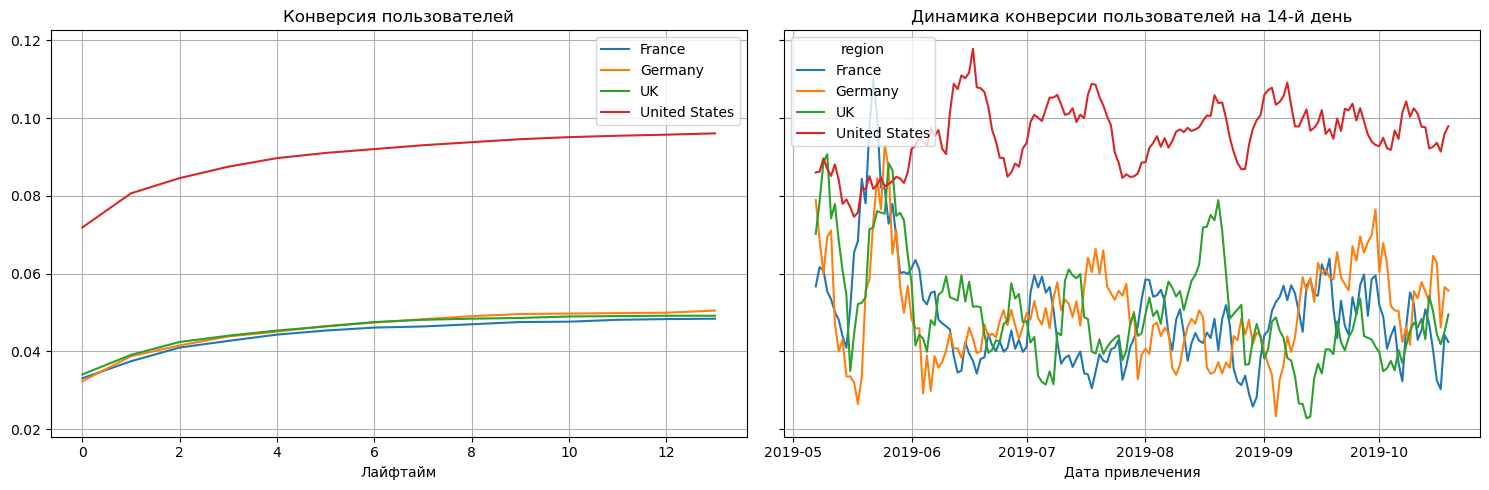

In [51]:
#посчитаем конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** конверсия пользователей США более чем в 2 раза выше, чем у пользователей из других стран, а динамика конверсии даже на 14-й день стабильна.

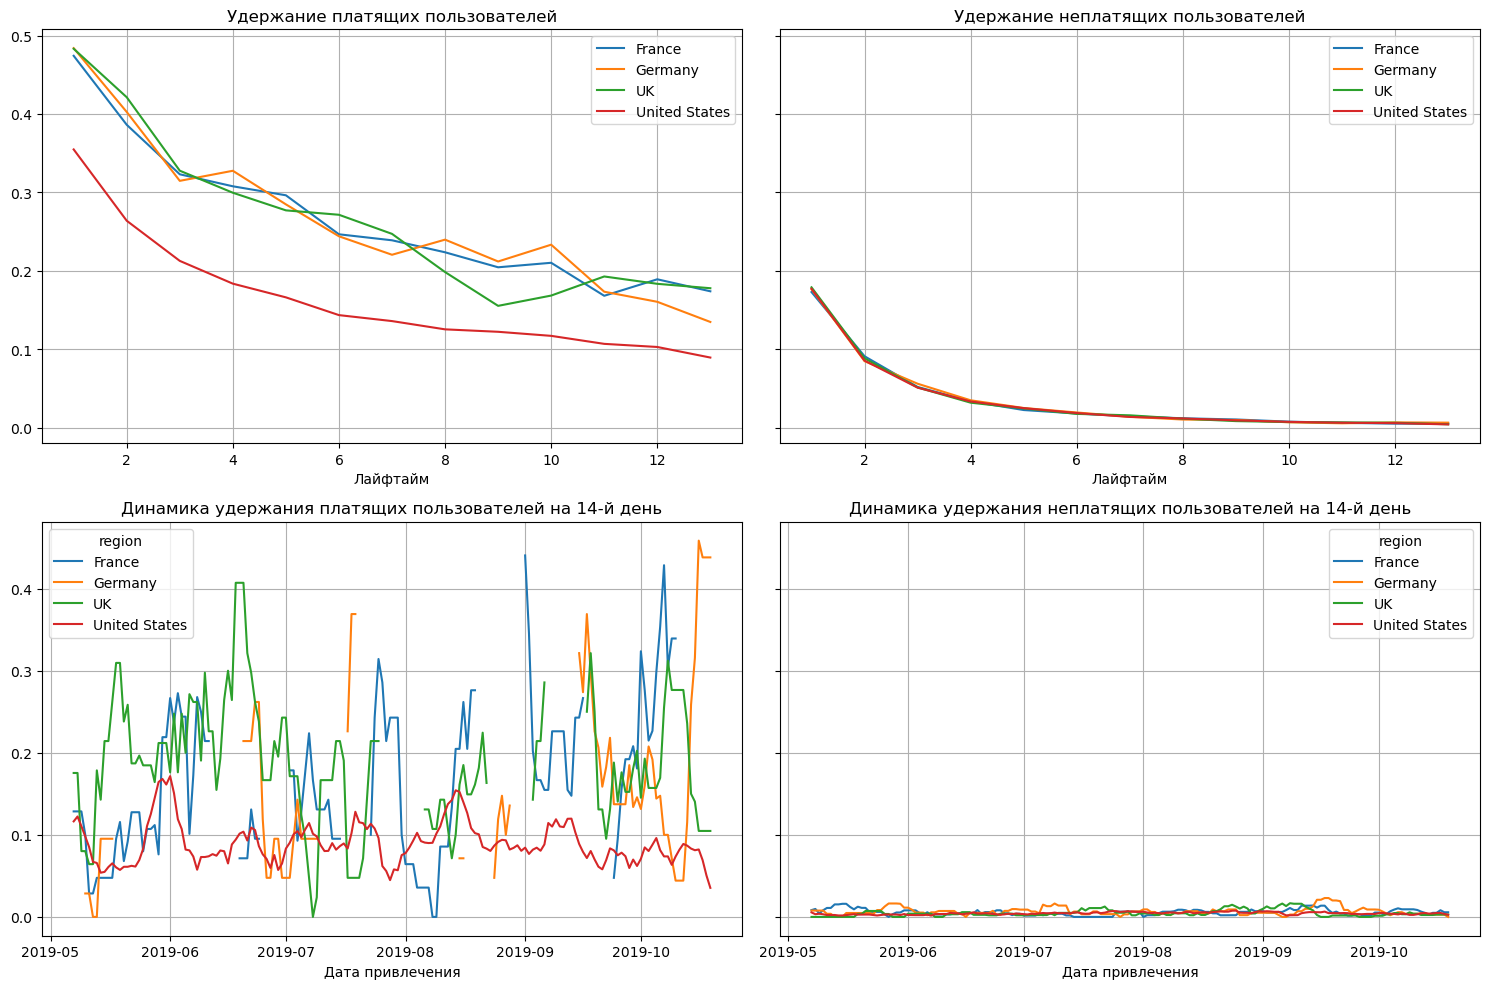

In [52]:
#посчитаем удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** что касается коэффциента удержания, то у платящих пользователей из США он явно ниже, чем в остальных странах. То есть можно сделать вывод, что при высокой конверсии покупатели из США быстро уходят и не проводят много времени на сайте. Стоит обратить на это повышенное внимание дальше.

**По каналам:**

Так как мы выявили проблемы с удержанием у платящих пользователей из США, рассмотрим конверсию и удержание с разбивкой по рекламным каналам профилями этих пользователей:

In [53]:
#выделим профили пользователей США
profiles_usa = profiles.query('region == "United States"')

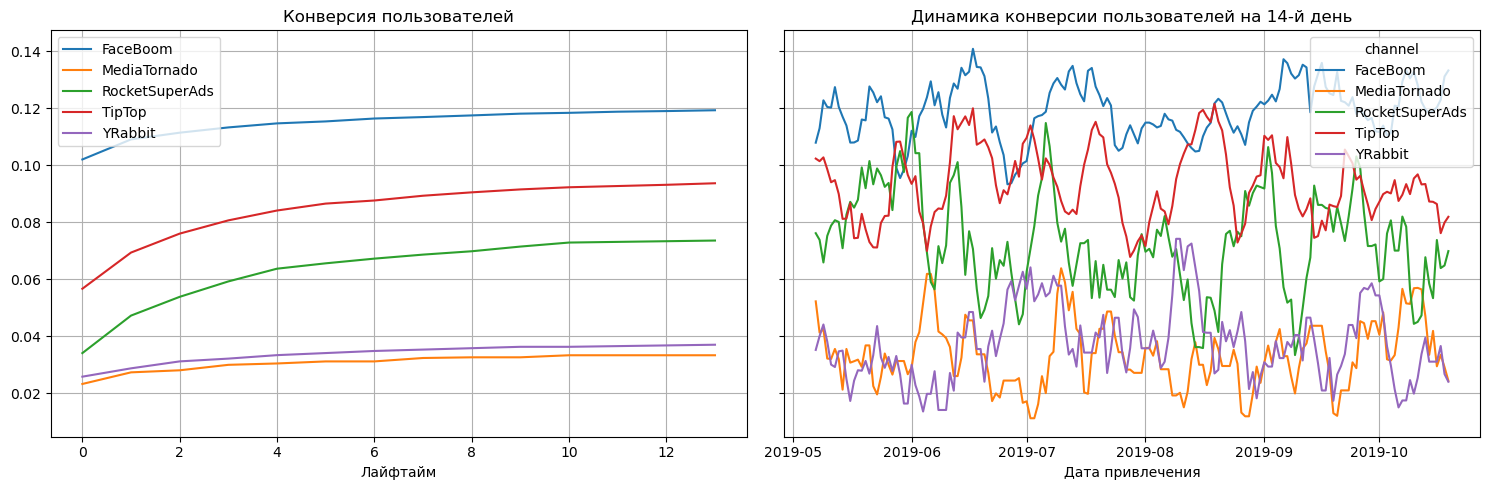

In [54]:
#посчитаем конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** в тройке лидеров по самой высокой конверсии в США - пользователи, которые пришли из FaceBoom, TipTop и RocketSuperAds. Каналы MediaTornado и YRabbit кратно отстают.

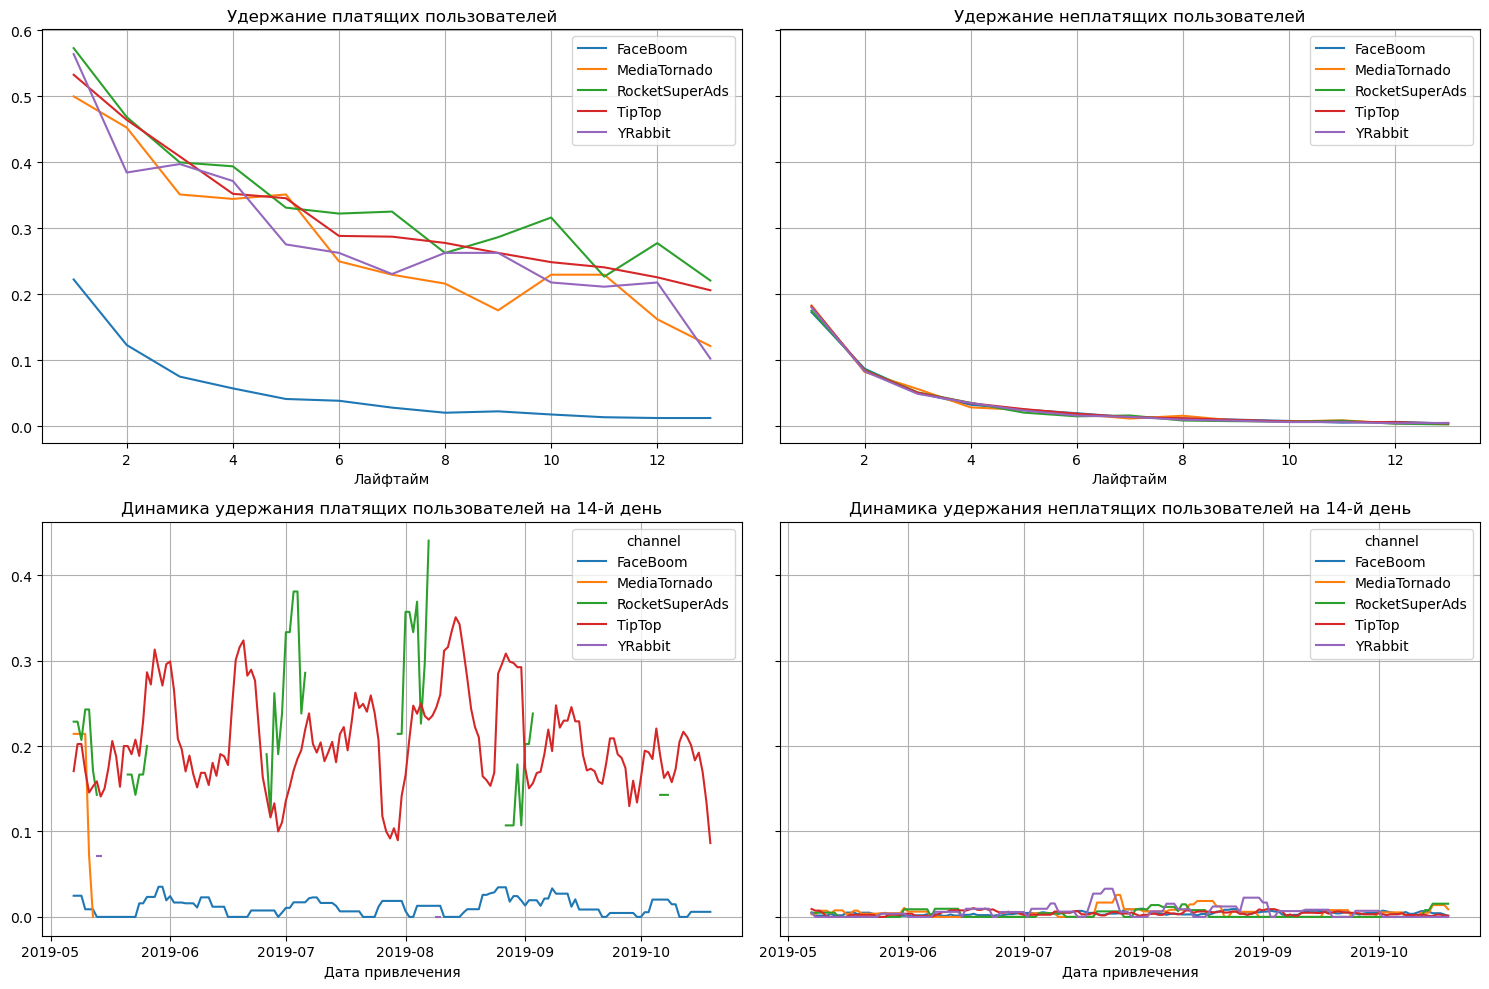

In [55]:
#посчитаем удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Удивительно, что самое низкое удержание платящих пользователей - у пришедших с FaceBoom (при самой высокой конверсии): к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, в то время как удержание у TipTop и RocketSuperAds в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 22%.

Рассмотрим также и Европеские регионы (всё, кроме США):

In [56]:
#выделим профили европейских пользователей
profiles_eur = profiles.query('region != "United States"')

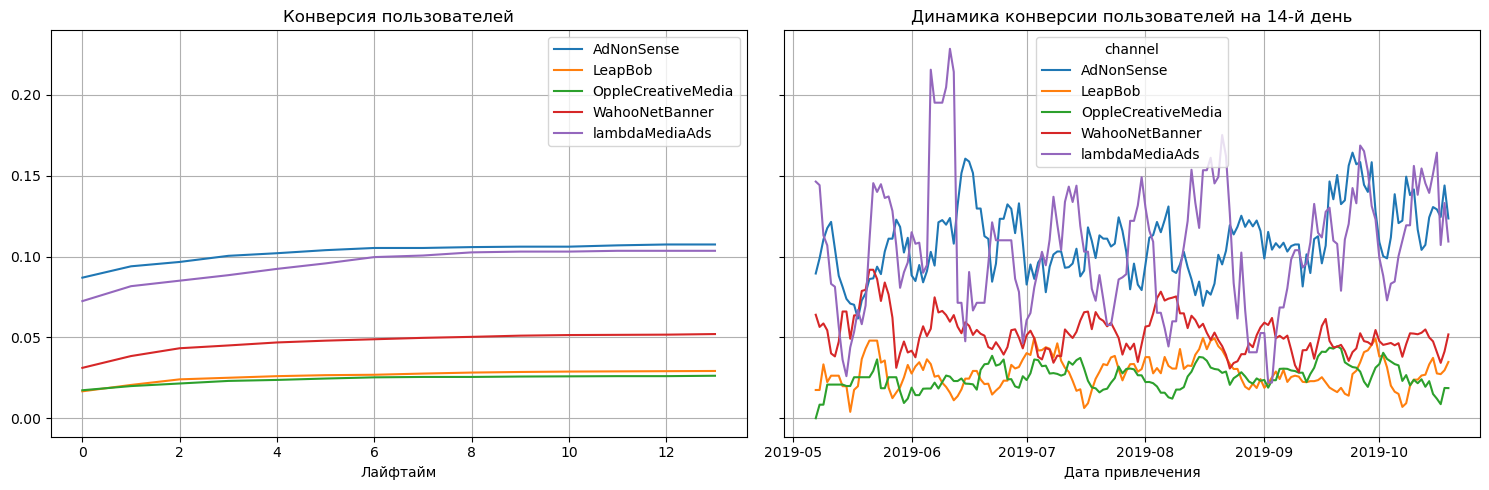

In [57]:
#посчитаем конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Самая высокая конверсия у каналов AdNonSense и lambdaMediaAds, а в динамике можно заметить их небольшой рост.

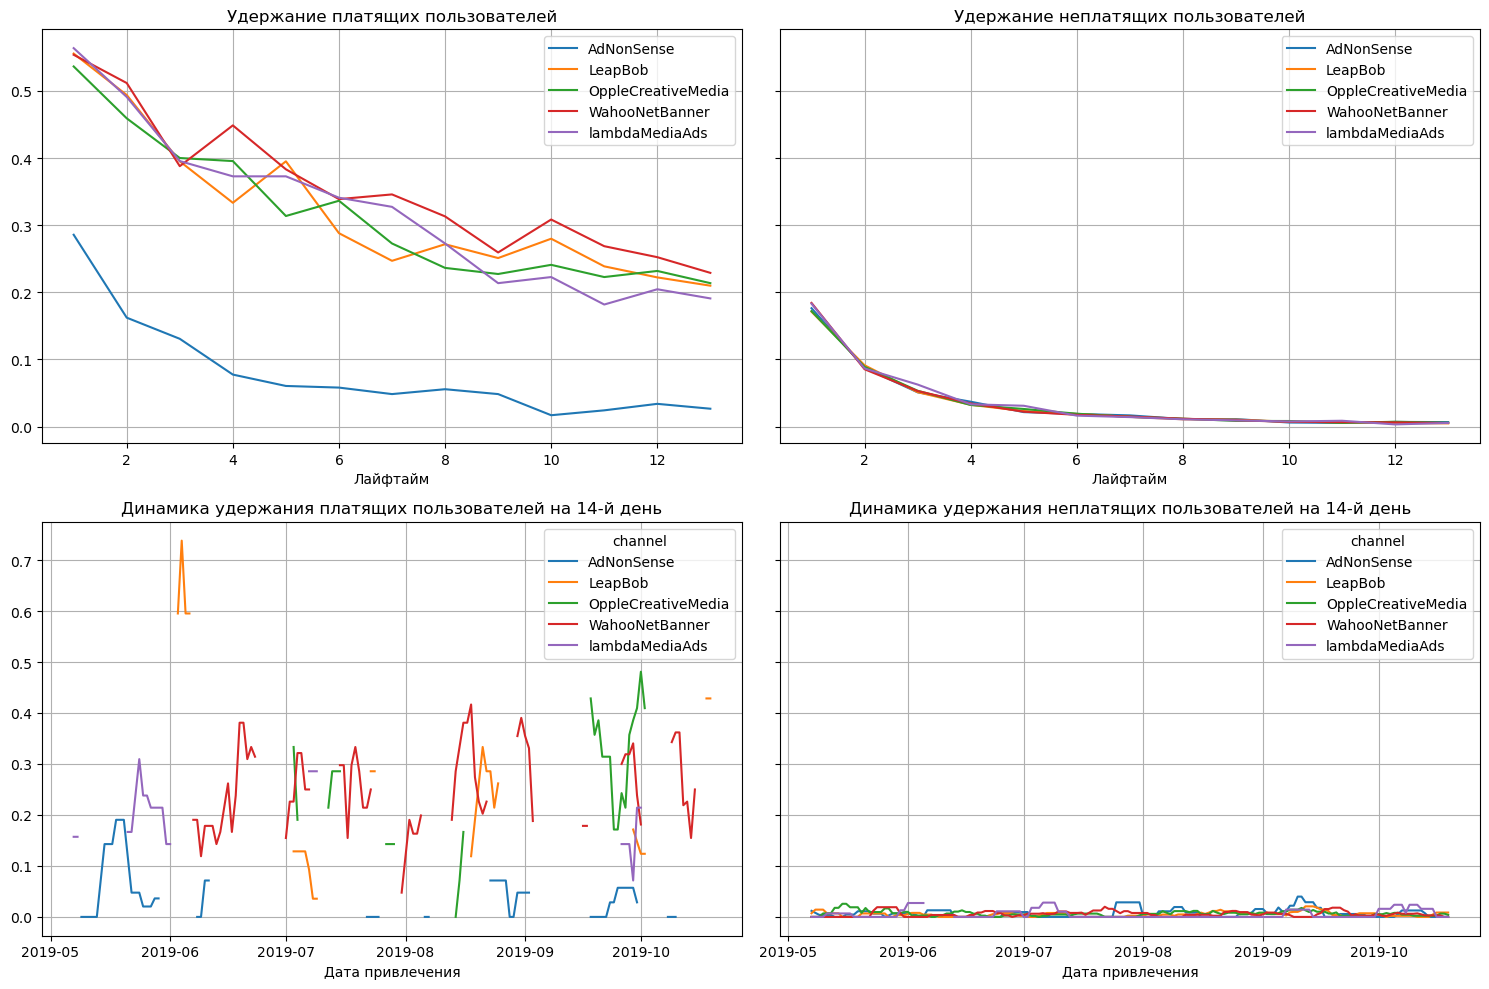

In [58]:
#посчитаем удержание с разбивкой по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eur, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Европейский канал AdNonSense показывает очень низкий уровень удержания, при конверсии выше других. Остальные каналы идут примерно вровень друг с другом. С учётом хорошей конверсии и стабильного удержания **канал lambdaMediaAds является наиболее привлекательным для Европейского рынка.**

### Окупаемость рекламы с разбивкой по устройствам

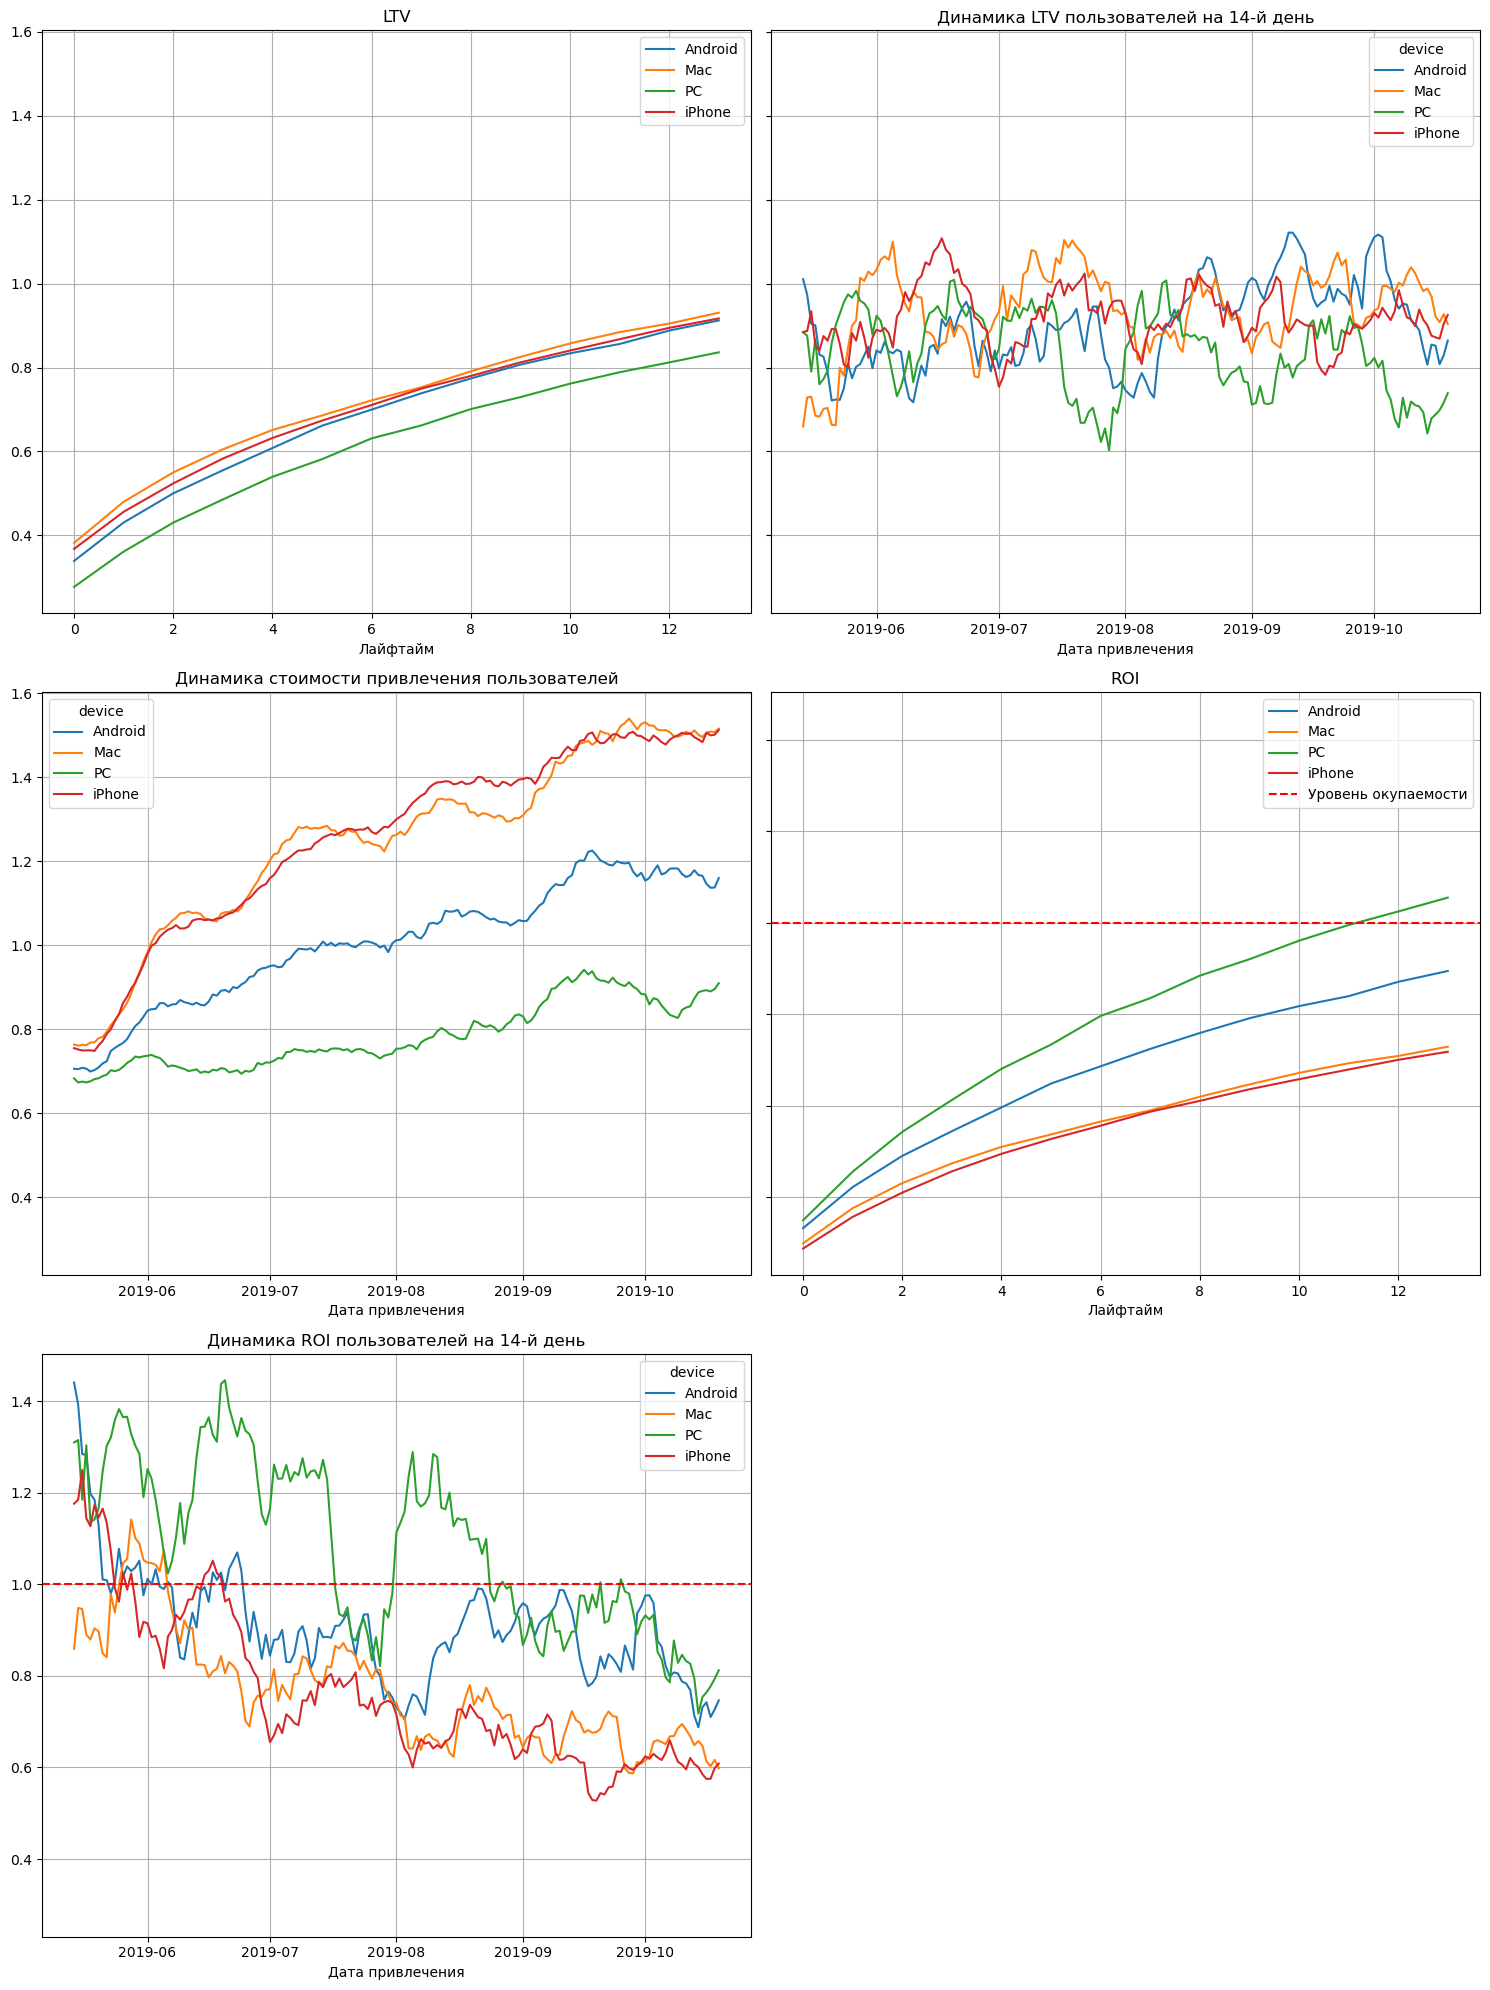

In [59]:
#посчитаем окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** при схожем уровне LTV, стабильно не окупаются пользователи всех девайсов, разве что наши лояльные пользователи PC незначительно превышают порог окупаемости (100%) с 11 дня, что не спасает ситуацию в целом. На всех устройствах растет стоимость привлечения, при этом хуже всего окупаются владельцы устройств iPhone и Mac. Это значит, что у нас, по крайней мере, нет технических проблем, влияющих на монетизацию.

### Окупаемость рекламы с разбивкой по странам

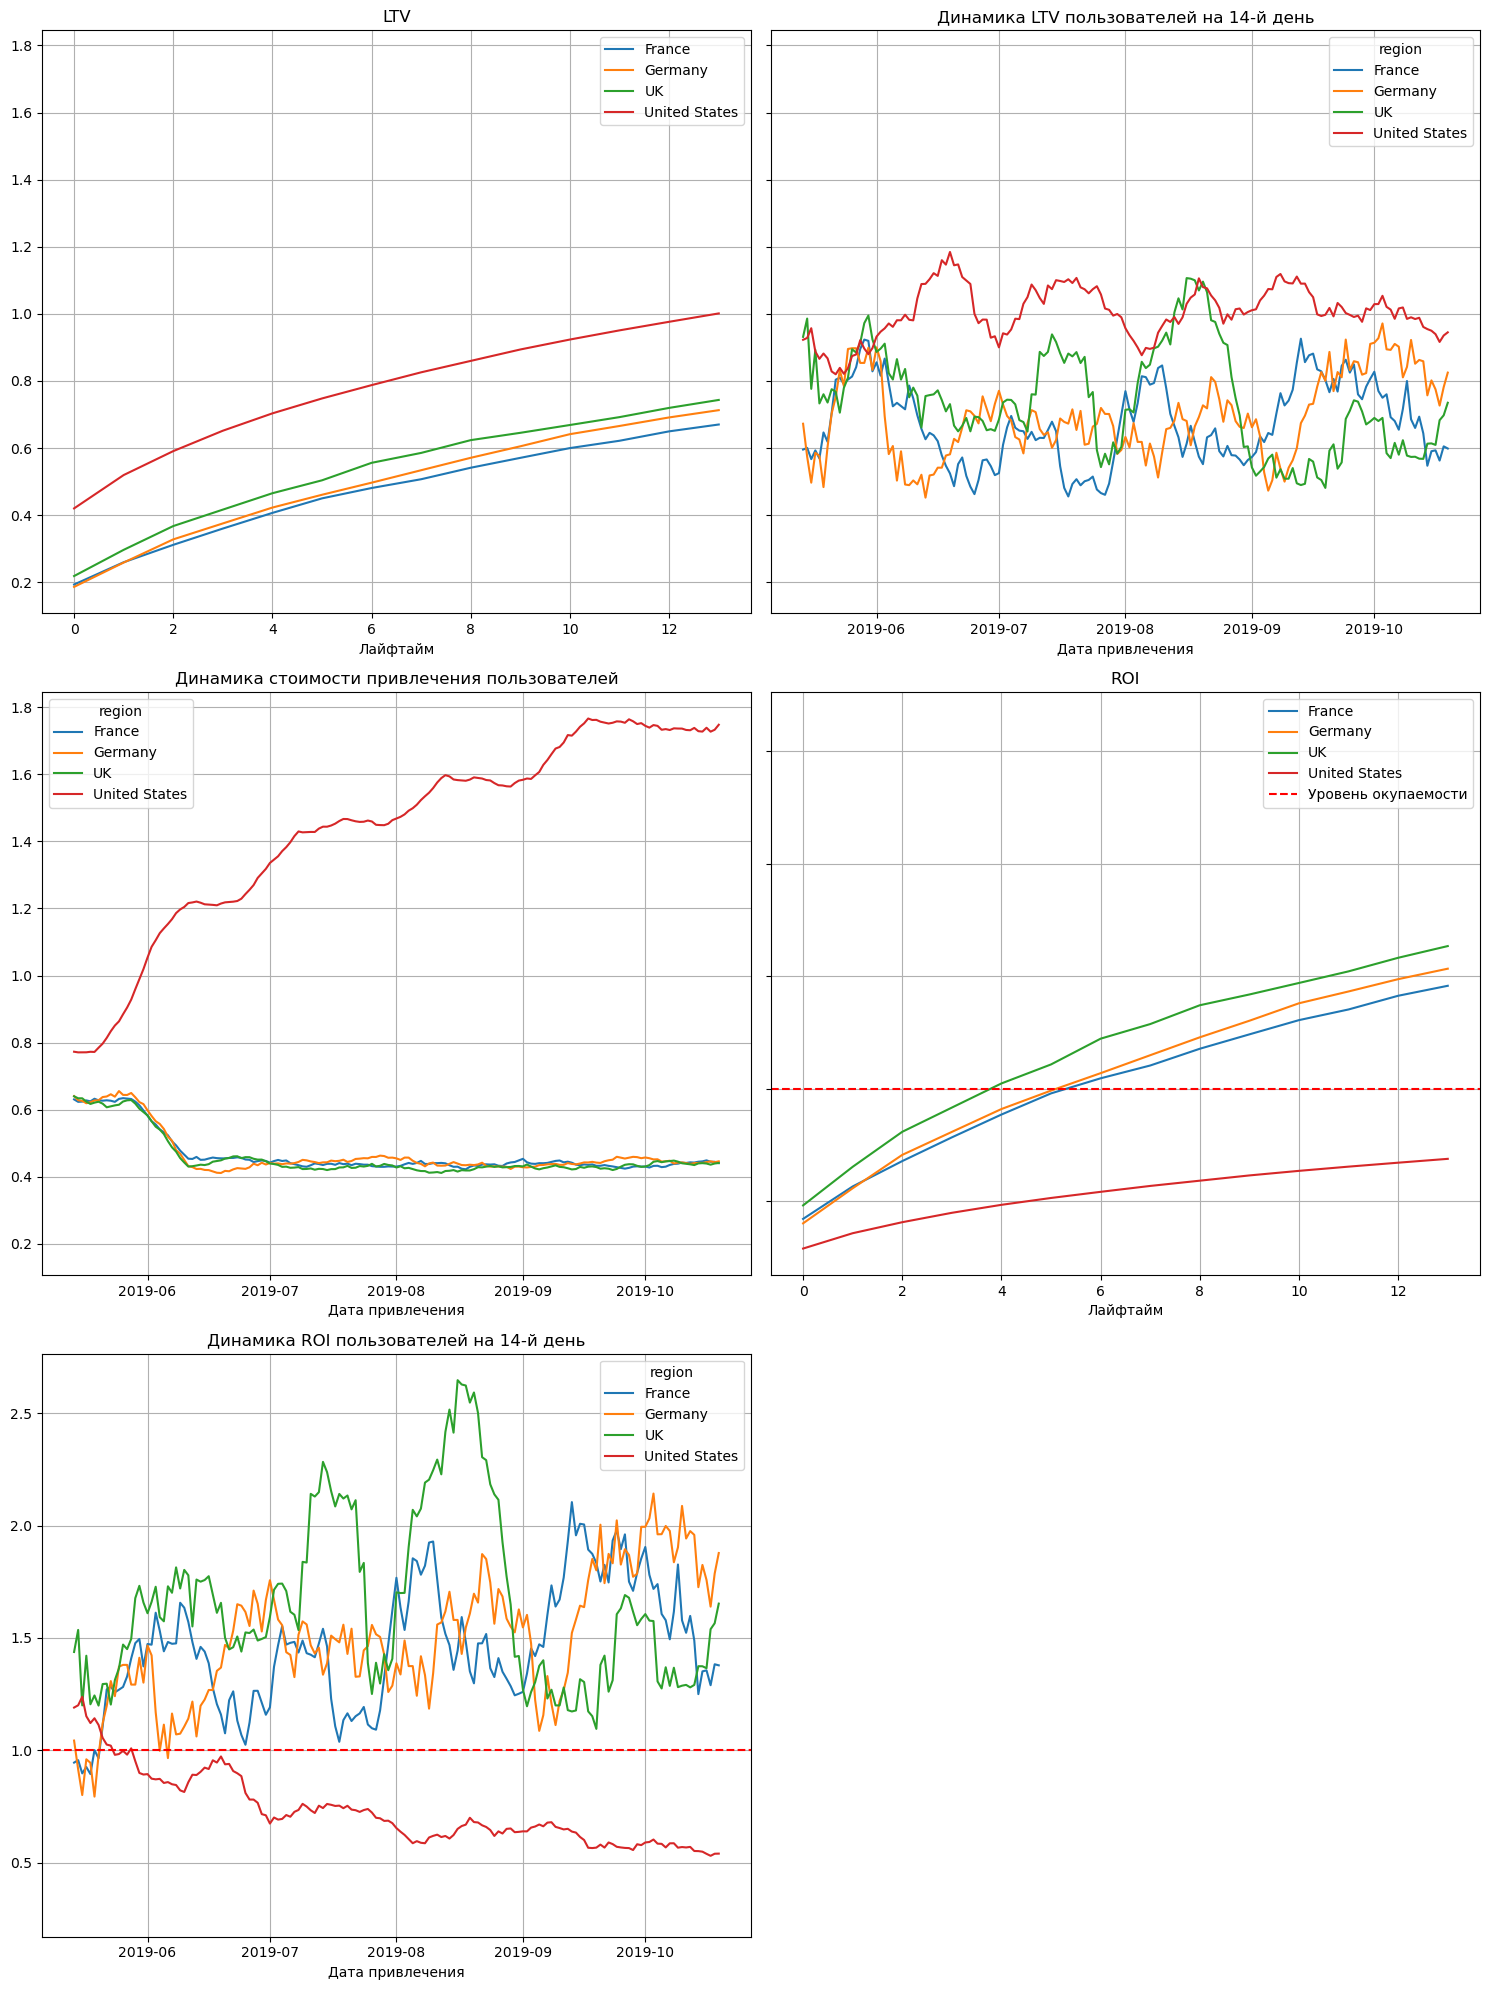

In [60]:
#посчитаем окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** на каждом из графиков выделяется кривая США: при наибольшем LTV стоимость привлечения пользователей несоизмеримо высока и постоянно растёт, в связи с чем реклама совершенно не окупается(ROI не поднимается выше 50%). При этом пользователи из других стран окупаются с 5-го дня и их показатели растут. Стоимость привлечения стабильно невысока.

С учётом того, что больше половины пользователей приложения именно из США, убытки от привлечения этих пользователей полностью перекрывают доходы окупаемых стран.

### Окупаемость рекламы с разбивкой по рекламным каналам

Поскольку проблемы с окупаемостью рекламы - только на рынке США, далее рассмотрим подробнее только рекламные каналы американского рынка.

In [61]:
#считаем количество пользователей США в разбивке по рекламным каналам
profiles_channel_usa = (profiles_usa.groupby('channel')['user_id'].count().reset_index())

#добавляем количество пользователей этих рекламных каналов во всех регионах
profiles_channel_usa.merge(profiles_channel[['channel', 'user_id']], on='channel').rename(
        columns={'user_id_x':'user_usa', 'user_id_y':'user_all'}).sort_values(by='user_usa', ascending=False)

channel  user_usa  user_all
0        FaceBoom     29144     29144
3          TipTop     19561     19561
2  RocketSuperAds      4448      4448
1    MediaTornado      4364      4364
4         YRabbit      4312      4312

Рекламные каналы, используемые в США, используются только в США и больше нигде.

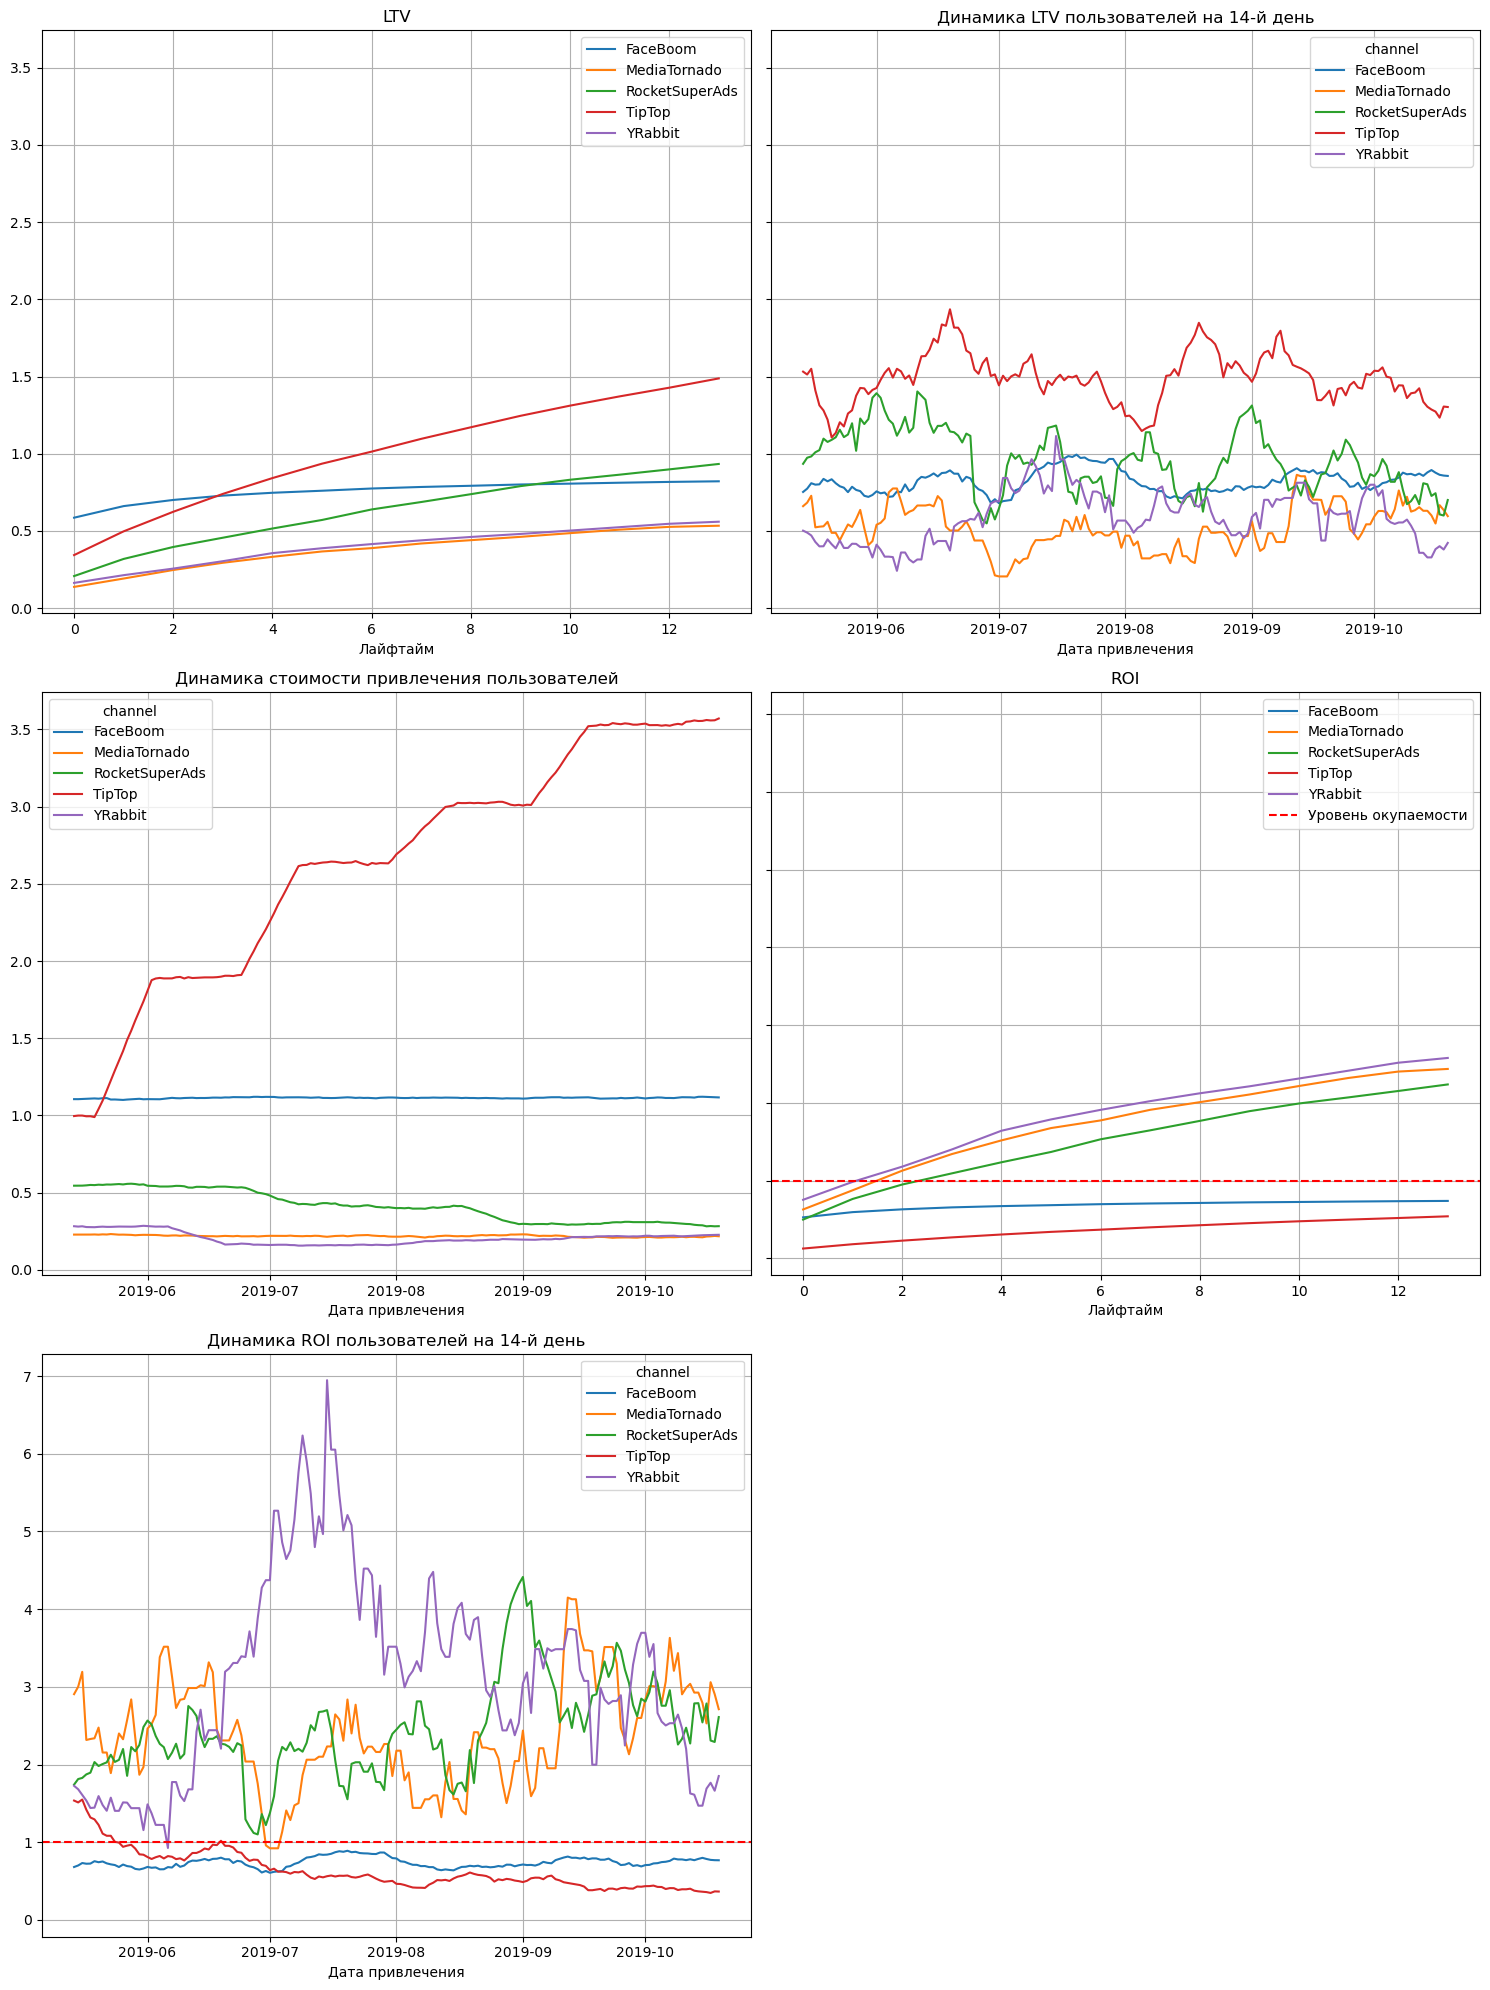

In [62]:
#считаем окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** Tip Top при самом большом LTV имеет высокую и постоянно растущую стоиомость привлечения и не приближается даже к порогу окупаемости (достигает максимум 60%). FaceBoom при не самом большом LTV также не окупается пр стабильно высокой стоимости привлечения в 1.1 у.е..   
Что касается хороших результатов: их показывают RocketSuperAds, YRabbit и MediaTornado. Вложения в них окупаются уже со второго дня и ROI продолжает расти. Однако, так как в этих трёх каналах суммарно меньше пользователей, чем у Tip Top и FaceBoom, то их окупаемость не спасает общую картину.

Взглянем на Европейский рынок тоже:

In [63]:
#считаем количество европейских пользователей в разбивке по рекламным каналам
profiles_eur.groupby('channel')['user_id'].count().sort_values(ascending=False).reset_index()

channel  user_id
0  OppleCreativeMedia     8605
1             LeapBob     8553
2      WahooNetBanner     8553
3          AdNonSense     3880
4      lambdaMediaAds     2149

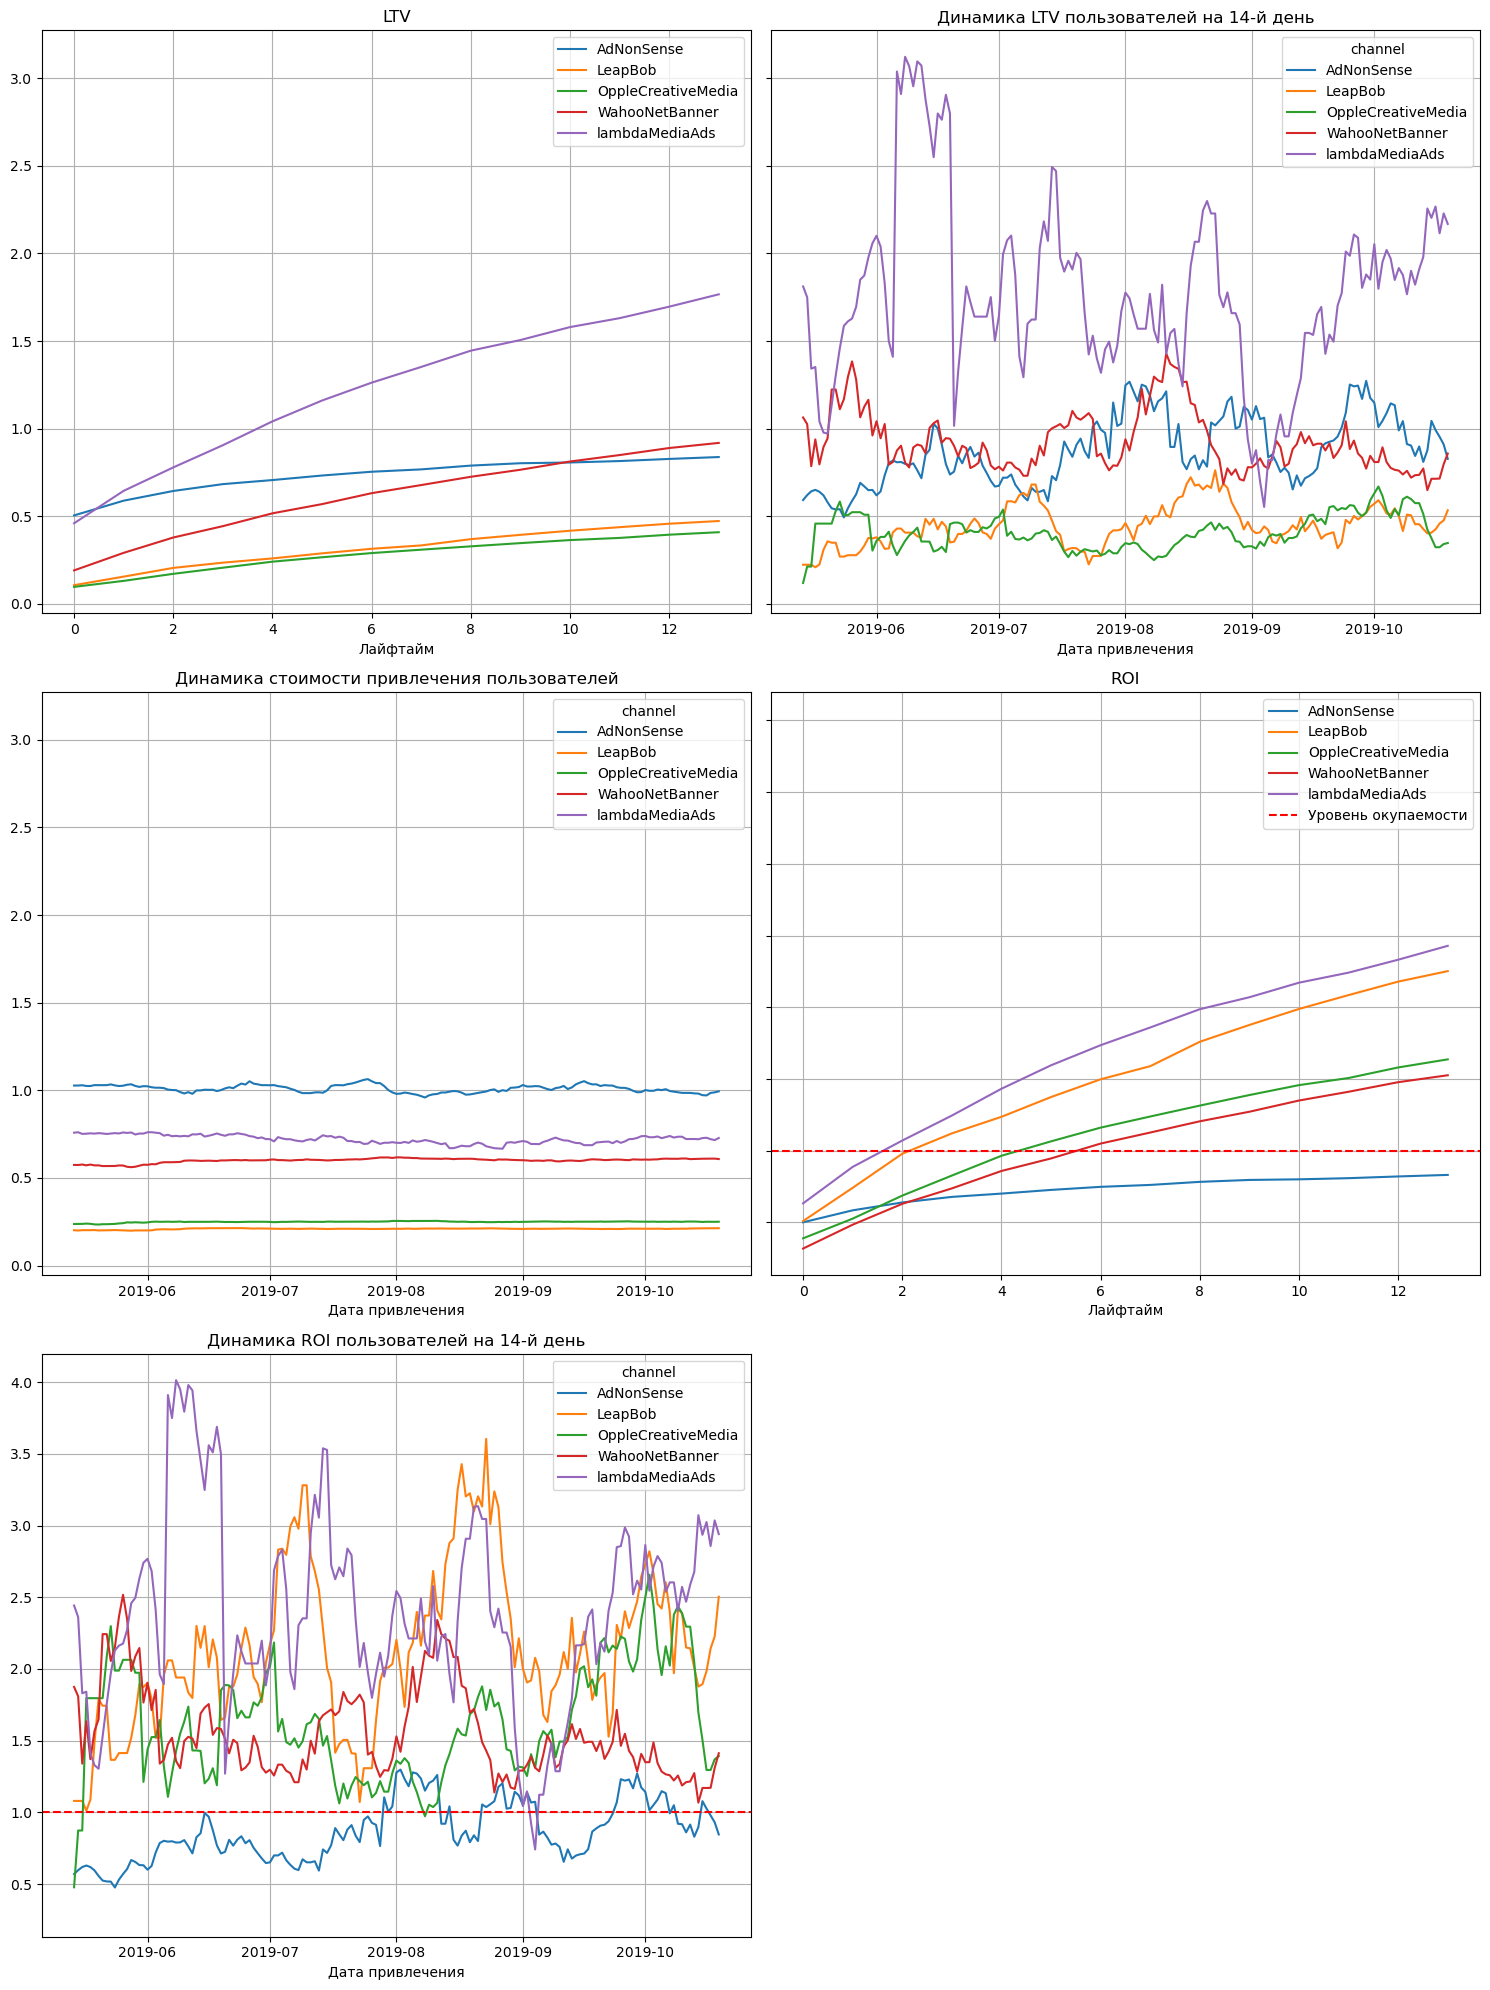

In [64]:
#считаем окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** на европейском рынке лучшими показателями обладает lambdaMediaAds: при наибольшем LTV достигающем 1.8 у.е., этот канал имеет самую хорошую окупаемость со второго дня при стабильной стоимости привлечения 0.7 у.е.. LeapBop также выглядит привлекательным каналом засчёт быстрой окупаемости и минимальных трат на привлечение. А вот AdNonSense так и не окупается даже за 2 недели, имея самую большую стоимость вложений 1 у.е. и невысокий LTV 0.8 у.е..

In [65]:
#выделим пользователей из Германии
profiles_ger = profiles.query('region == "Germany"')

#считаем количество пользователей из Германии в разбивке по рекламным каналам
profiles_ger.groupby('channel')['user_id'].count().sort_values(ascending=False).reset_index()

channel  user_id
0      WahooNetBanner     2579
1  OppleCreativeMedia     2562
2             LeapBob     2519
3          AdNonSense     1219
4      lambdaMediaAds      649

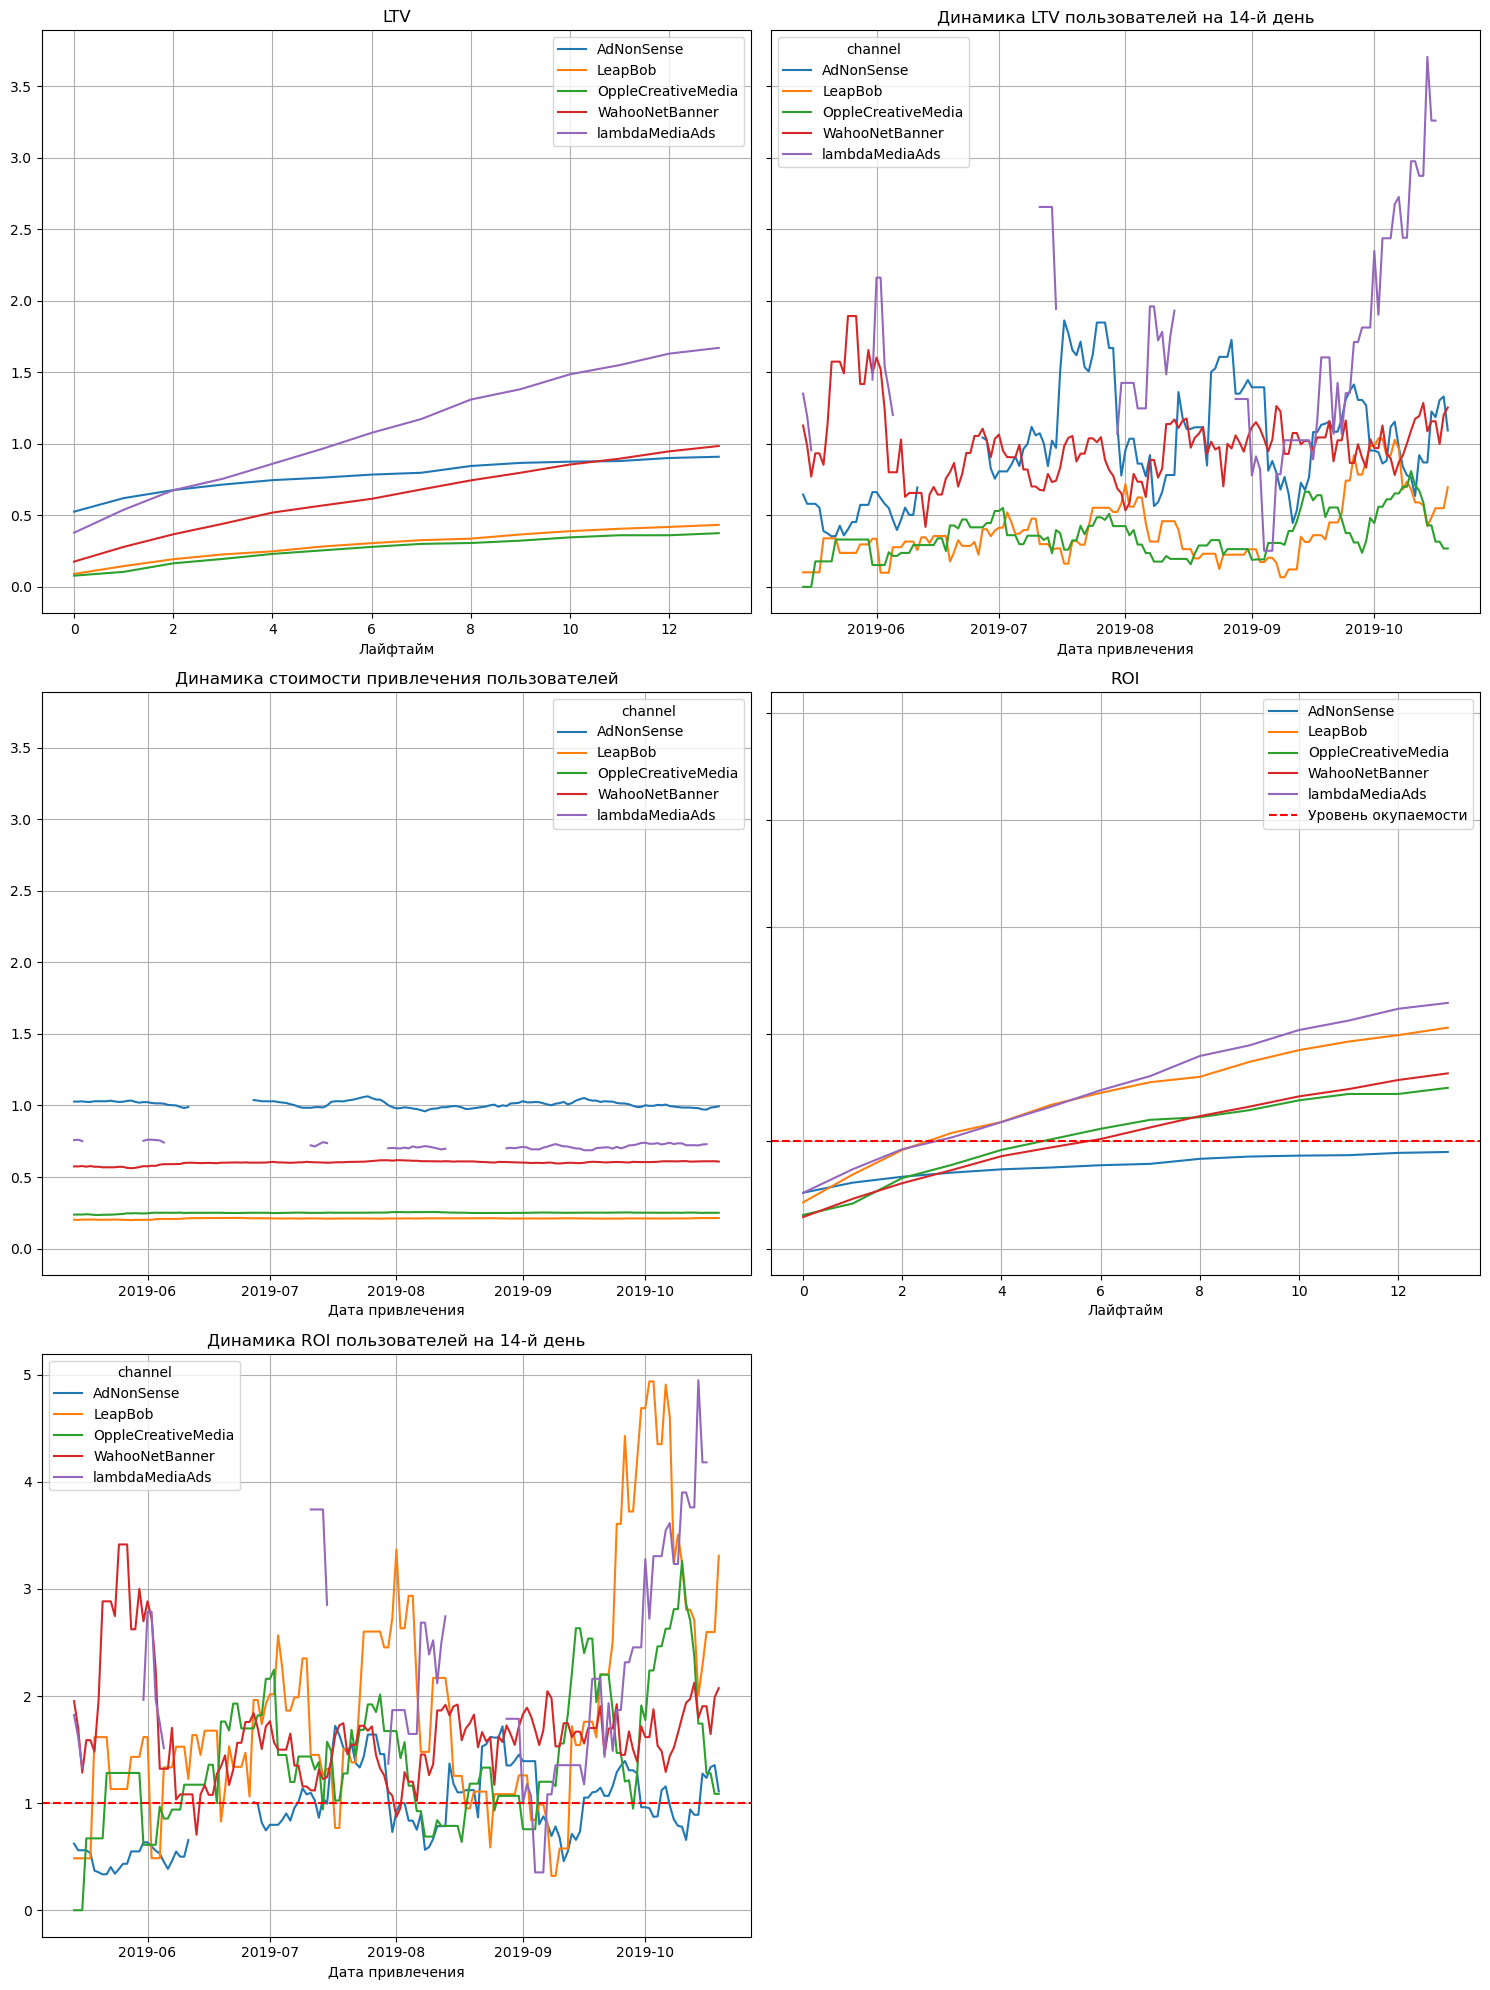

In [66]:
#считаем окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ger, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** среди пользователей из Германии наиболее популярными являются каналы WahooNetBanner, OppleCreativeMedia и LeapBob почти равномерно распределив между собой по 2500 пользователелей. Однако, несмотря на быструю окупаемость со 2 и 4 дня и низкую стоимость привлечения, эти каналы приносят совсем небольшой LTV. Учитывая это, стоит рассмотреть дополнительное привлечение пользователей через эти каналы. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.

In [67]:
#выделим пользователей из Франции
profiles_fra = profiles.query('region == "France"')

#считаем количество пользователей из Франции в разбивке по рекламным каналам
profiles_fra.groupby('channel')['user_id'].count().sort_values(ascending=False).reset_index()

channel  user_id
0  OppleCreativeMedia     2991
1             LeapBob     2988
2      WahooNetBanner     2971
3          AdNonSense     1366
4      lambdaMediaAds      742

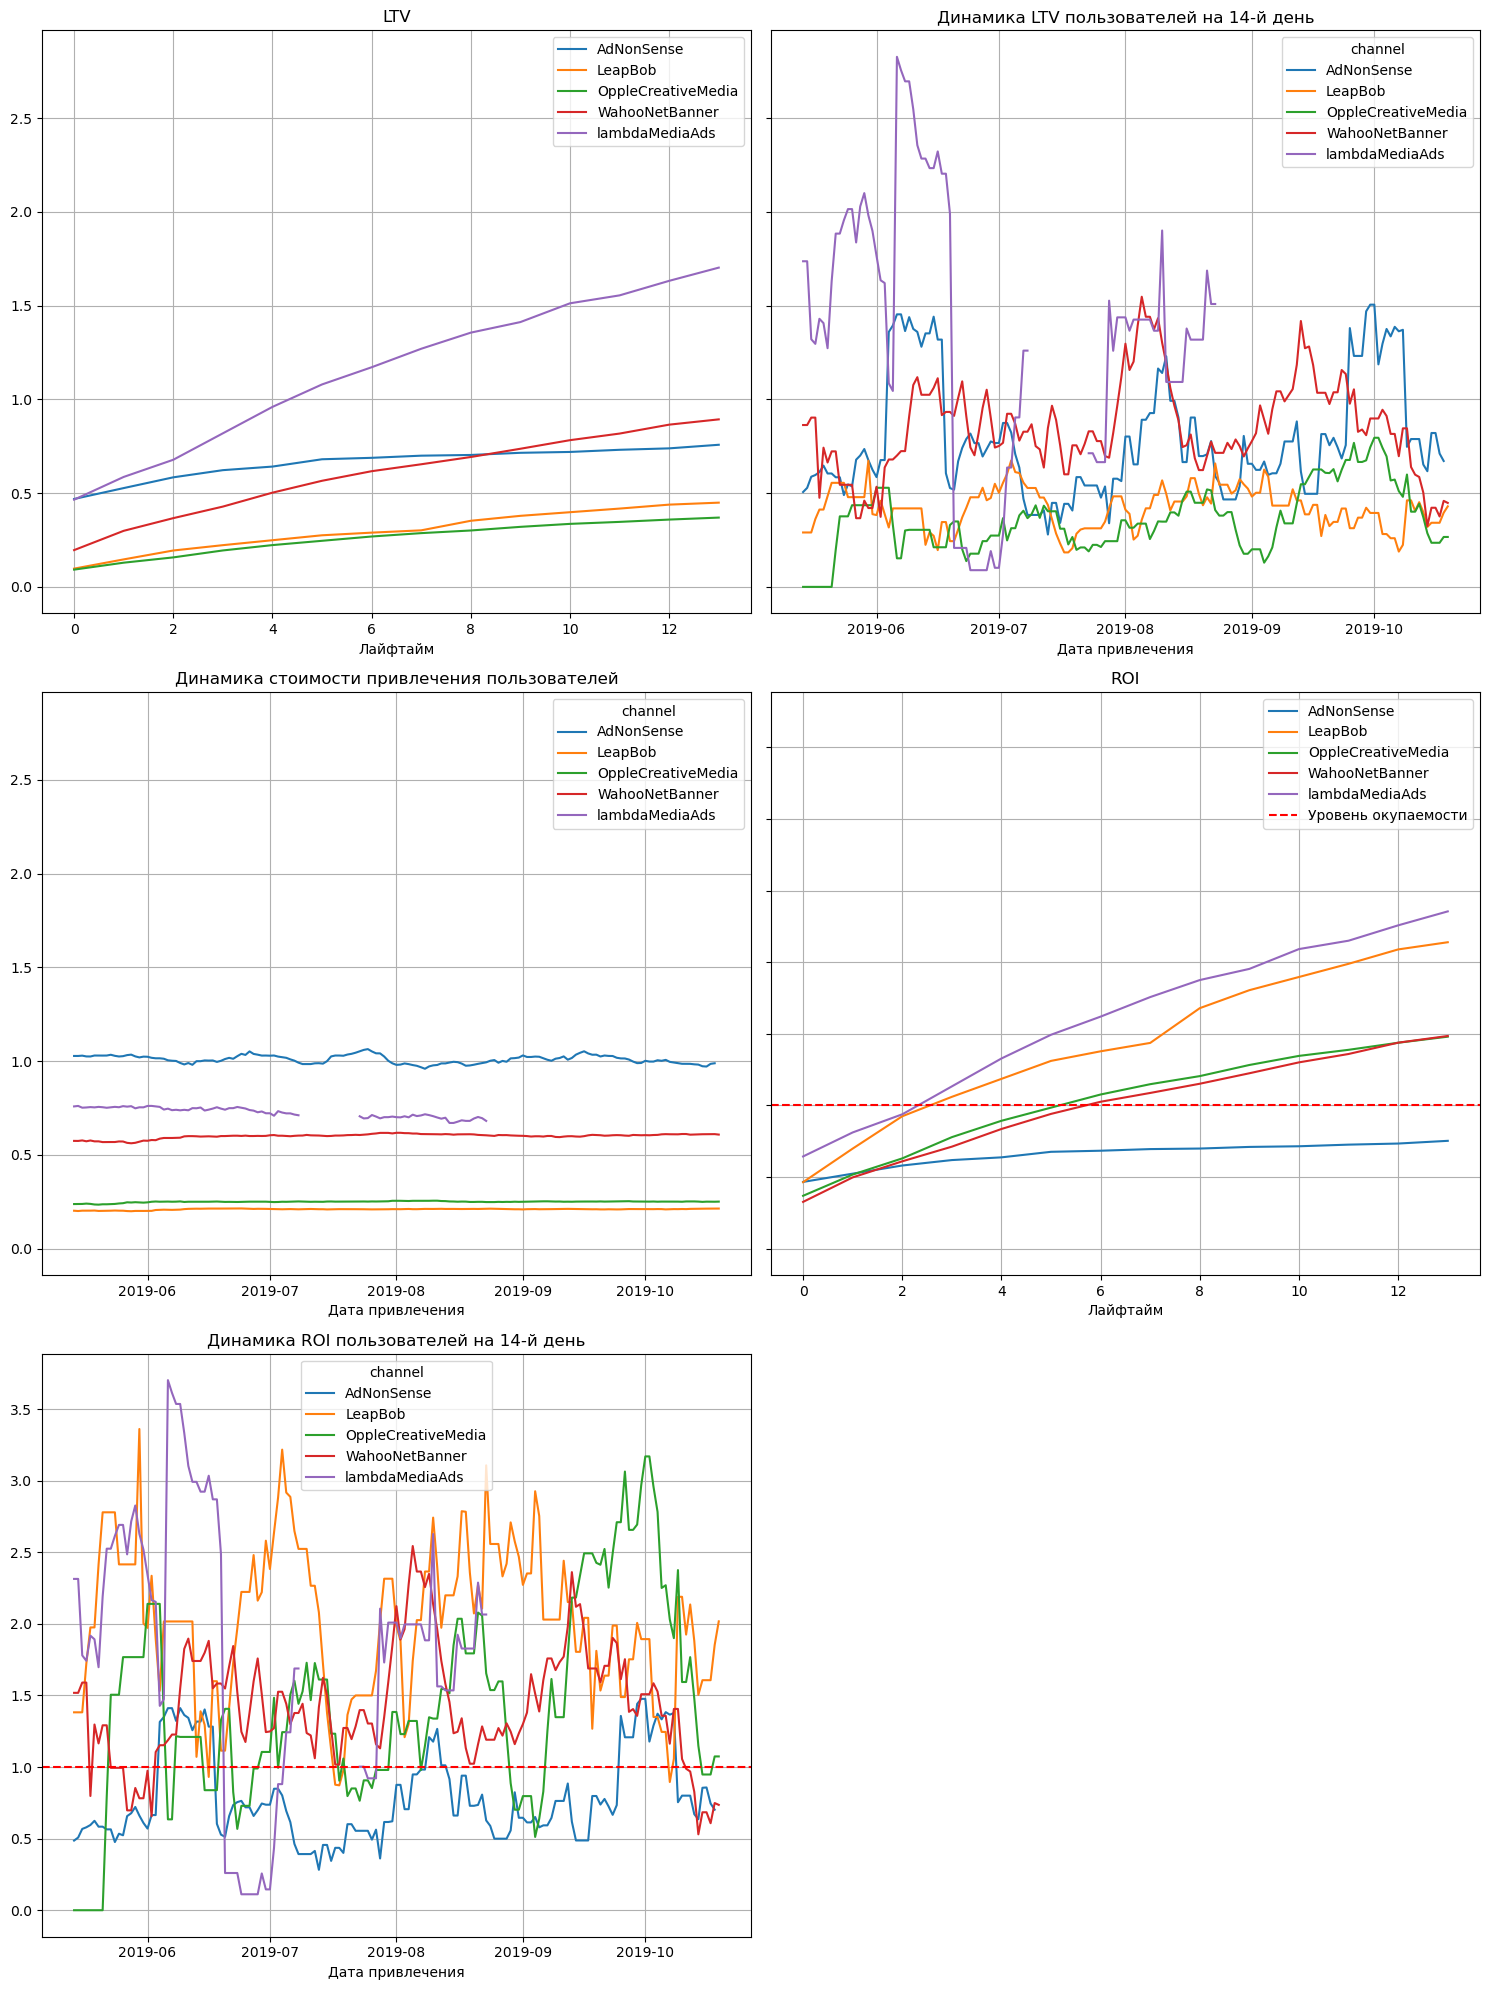

In [68]:
#считаем окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_fra, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

**Вывод:** среди пользователей из Франции наиболее популярными являются каналы OppleCreativeMedia, LeapBob и WahooNetBanner	распределив между собой примерно по 2900 пользователей. LeapBob окупается уже со 2-го дня, а вот OppleCreativeMedia и WahooNetBanner только с 6-го. Также можно заметить, что WahooNetBanner имеет самую большую из трёх стоимость привлечения и самый большой LTV на уровне 0.9 у.е. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.

**Вывод по разделу:**

* **Окупается ли реклама, направленная на привлечение пользователей в целом?**

К сожалению, нет, динамика LTV стабильна, а расходы по привлечению постоянно растут, в связи с этим окупаемость снизилась и с середины июня ROI опустился ниже предельного уровня - это проблема. Реклама не окупается к концу второй недели и достигает только 80%, что негативно сказывается на прибыли компании.

* **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

По устройствам:
iPhone и Mac держат хорошую и стабильную конверсию, а вот пользователи PC конвертируются ощутимо меньше. Что интересно, при самой низкой конверсии у пользователей РС, у них же самое высокое удержание платящих пользователей. То есть скорее всего они более лояльные, хоть их и количественно меньше.

По странам:
Конверсия пользователей США более чем в 2 раза выше, чем у пользователей из других стран, а динамика конверсии даже на 14-й день стабильна. Что касается коэффциента удержания, то у платящих пользователей из США он явно ниже, чем в остальных странах. То есть можно сделать вывод, что при высокой конверсии покупатели из США быстро уходят и не проводят много времени на сайте. Стоит обратить на это повышенное внимание дальше.

По каналам:
В тройке лидеров по самой высокой конверсии в США - пользователи, которые пришли из FaceBoom, TipTop и RocketSuperAds. Каналы MediaTornado и YRabbit кратно отстают. Удивительно, что самое низкое удержание платящих пользователей - у пришедших с FaceBoom (при самой высокой конверсии): к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, в то время как удержание у TipTop и RocketSuperAds в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 22%.

* **Чем могут быть вызваны проблемы окупаемости?**

Что касается окупаемости в разрезе по устройствам
При схожем уровне LTV, стабильно не окупаются пользователи всех устройств, разве что наши лояльные пользователи PC незначительно превышают порог окупаемости (100%) с 11 дня, что не спасает ситуацию в целом. На всех устройствах растет стоимость привлечения, при этом хуже всего окупаются владельцы устройств iPhone и Mac.

Что касается окупаемости в разрезе по странам
При наибольшем LTV **стоимость привлечения пользователей из США несоизмеримо высока и постоянно растёт**, в связи с чем реклама совершенно не окупается(ROI не поднимается выше 50%). При этом пользователи из других стран окупаются с 5-го дня и их показатели растут. Стоимость привлечения стабильно невысока. **С учётом того, что больше половины пользователей приложения именно из США, убытки от привлечения этих пользователей полностью перекрывают доходы окупаемых стран.**

**Среди пользователей из США** Tip Top при самом большом LTV имеет высокую и постоянно растущую стоиомость привлечения и не приближается даже к порогу окупаемости (достигает максимум 60%). FaceBoom при не самом большом LTV также не окупается пр стабильно высокой стоимости привлечения в 1.1 у.е..
Что касается хороших результатов: их показывают RocketSuperAds, YRabbit и MediaTornado. Вложения в них окупаются уже со второго дня и ROI продолжает расти. Однако, так как в этих трёх каналах суммарно меньше пользователей, чем у Tip Top и FaceBoom, то их окупаемость не спасает общую картину. 

**Среди пользователей из Германии** наиболее популярными являются каналы WahooNetBanner, OppleCreativeMedia и LeapBob почти равномерно распределив между собой по 2500 пользователелей. Однако, несмотря на быструю окупаемость со 2 и 4 дня и низкую стоимость привлечения, эти каналы приносят совсем небольшой LTV. Учитывая это, стоит рассмотреть дополнительное привлечение пользователей через эти каналы. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.

**Среди пользователей из Франции** наиболее популярными являются каналы OppleCreativeMedia, LeapBob и WahooNetBanner распределив между собой примерно по 2900 пользователей. LeapBob окупается уже со 2-го дня, а вот OppleCreativeMedia и WahooNetBanner только с 6-го. Также можно заметить, что WahooNetBanner имеет самую большую из трёх стоимость привлечения и самый большой LTV на уровне 0.9 у.е. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.


## Общий вывод

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

**Предобработка:**  

Нами были обработаны данные о посещениях новых пользователей, которые зарегистрировались в период с 2019-05-01 по 2019-10-27, сведениях об их покупках за этот период, а также статистика рекламных расходов. В результате предобработки исправлены нарушения стиля в наименовании столбцов и были скорректированы типы данных в столбцах, в которых обозначена дата: с типа object на datetime.

Для проведения анализа были сформированы 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте, за период привлечения с мая по октябрь 2019 г. включительно.

**Результаты анализа:**

**Больше половины пользователей приложения из США**, а оставшаяся доля распределяется почти равномерно среди пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше всего в США: почти 7% в отличии от примерно 4% у других стран.

**Самое популярное устройство для входа - iPhone** (таких пользователей почти 6000) это логично коррелируется с тем, что из США большинство наших пользователей. По остальным устройствам Android, PC, Mac приходится 3000-3500 соответственно. А вот доля платящих пользователей самая большая у пользователей Mac (5-6,2%), хотя и среди пользователей iPhone также достаточно высокий доказатель платящих.

Больше всего пользователей (56.000) органические, то есть приходят самостоятельно, однако доля платящих среди них ожидаемо самая низкая (около 2%), так как их не привлекали целенаправленно. Далее в рейтинге идут самые крупные рекламные источники **FaceBoom и TipTop**, они **дают 50% пользователей**. Что касается доли платящих пользователей, лидирует FaceBoom (12.2%) и на червёртом месте TipTop(9.6%), а также два непопулярных рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%).

**Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 у.е.** Основная доля расходов приходится на рекламные каналы TipTop (51.9%) и FaceBoom (30.75%). В динамике можно заметить рост вложений в течение всего исследуемого периода по каналам TipTop и FaceBoom, тогда как затраты на остальные каналы привлечения остаются стабильными, при этом в абсолюте гораздо ниже.

**Средняя стоимость привлечения одного пользователя: 1.13.** Так как средняя стоимость привлечения одного пользователя 1.13, то её больше чем в 2 раза превысил TipTop (2,8 у.е.) и почти достигли FaceBoom (1,11 у.е.) и AdNonSense (1,0 у.е.). **Будем считать TipTop самым дорогим каналом привлечения.**

Что касается общей окупаемости, **динамика LTV стабильна, а расходы по привлечению постоянно растут**, в связи с этим **окупаемость снизилась и с середины июня ROI опустился ниже предельного уровня** - это проблема. Реклама не окупается к концу второй недели и достигает только 80%, что негативно сказывается на прибыли компании. 

* По устройствам:

iPhone и Mac держат хорошую и стабильную конверсию, а вот пользователи PC конвертируются ощутимо меньше. Что интересно, при самой низкой конверсии у пользователей РС, у них же самое высокое удержание платящих пользователей. То есть скорее всего они более лояльные, хоть их и количественно меньше.

* По странам:  

Конверсия пользователей США более чем в 2 раза выше, чем у пользователей из других стран, а динамика конверсии даже на 14-й день стабильна. Что касается коэффциента удержания, то у платящих пользователей из США он явно ниже, чем в остальных странах. То есть можно сделать вывод, что при высокой конверсии покупатели из США быстро уходят и не проводят много времени на сайте. Стоит обратить на это повышенное внимание дальше.

* По каналам:  

В тройке лидеров по самой высокой конверсии в США - пользователи, которые пришли из FaceBoom, TipTop и RocketSuperAds. Каналы MediaTornado и YRabbit кратно отстают. Удивительно, что самое низкое удержание платящих пользователей - у пришедших с FaceBoom (при самой высокой конверсии): к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%, в то время как удержание у TipTop и RocketSuperAds в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 22%.


Если рассмотреть Европейский рынок, то самая высокая конверсия у каналов AdNonSense и lambdaMediaAds, а в динамике можно заметить их небольшой рост. AdNonSense показывает очень низкий уровень удержания, при конверсии выше других. Остальные каналы идут примерно вровень друг с другом. С учётом хорошей конверсии и стабильного удержания канал **lambdaMediaAds является наиболее привлекательным для Европейского рынка.**

* Что касается окупаемости в разрезе по устройствам 

При схожем уровне LTV, **стабильно не окупаются пользователи всех устройств**, разве что наши лояльные пользователи PC незначительно превышают порог окупаемости (100%) с 11 дня, что не спасает ситуацию в целом. На всех устройствах растет стоимость привлечения, при этом **хуже всего окупаются владельцы устройств iPhone и Mac**.

* Что касается окупаемости в разрезе по странам 

При наибольшем LTV **стоимость привлечения пользователей из США несоизмеримо высока и постоянно растёт**, в связи с чем реклама совершенно не окупается(ROI не поднимается выше 50%). При этом пользователи из других стран окупаются с 5-го дня и их показатели растут. Стоимость привлечения стабильно невысока. С учётом того, что больше половины пользователей приложения именно из США, **убытки от привлечения этих пользователей полностью перекрывают доходы окупаемых стран**.

* Что касается окупаемости в разрезе по каналам привлечения на Американском рынке

**Среди пользователей из США Tip Top** при самом большом LTV имеет высокую и постоянно растущую стоиомость привлечения и не приближается даже к порогу окупаемости (достигает максимум 60%). **FaceBoom** при не самом большом LTV также не окупается при стабильно высокой стоимости привлечения в 1.1 у.е.. Что касается хороших результатов: их показывают **RocketSuperAds, YRabbit и MediaTornado**. Вложения в них окупаются уже **со второго дня и ROI продолжает расти**. Однако, так как в этих трёх каналах суммарно меньше пользователей, чем у Tip Top и FaceBoom, то их окупаемость не спасает общую картину.

* Что касается окупаемости в разрезе по каналам привлечения на Европейском рынке    

Лучшими показателями обладает lambdaMediaAds: при наибольшем LTV достигающем 1.8 у.е., этот канал имеет самую хорошую окупаемость со второго дня при стабильной стоимости привлечения 0.7 у.е.. LeapBop также выглядит привлекательным каналом засчёт быстрой окупаемости и минимальных трат на привлечение. А вот AdNonSense так и не окупается даже за 2 недели, имея самую большую стоимость вложений 1 у.е. и невысокий LTV 0.8 у.е..

**Среди пользователей из Германии** наиболее популярными являются каналы WahooNetBanner, OppleCreativeMedia и LeapBob почти равномерно распределив между собой по 2500 пользователелей. Однако, несмотря на быструю окупаемость со 2 и 4 дня и низкую стоимость привлечения, эти каналы приносят совсем небольшой LTV. Учитывая это, стоит рассмотреть дополнительное привлечение пользователей через эти каналы. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.

**Среди пользователей из Франции** наиболее популярными являются каналы OppleCreativeMedia, LeapBob и WahooNetBanner распределив между собой примерно по 2900 пользователей. LeapBob окупается уже со 2-го дня, а вот OppleCreativeMedia и WahooNetBanner только с 6-го. Также можно заметить, что WahooNetBanner имеет самую большую из трёх стоимость привлечения и самый большой LTV на уровне 0.9 у.е. В то же время AdNonSense не окупается и имеет самую большую стоимость привлечения, что делает его сразу невыгодным.

**Рекомендации:**

* Необходимо изучить причину низкого уровня удержания пользователей из США. 
* Оценить целесообразность вложений в канал привлечения TipTop.
* Изучить причину низкого удержания пользователей из FaceBoom при самой высокой конверсии, возможно в приложении не хватает чего-то, что нужно этим пользователям, помочь выяснить это может опрос пользователей и дальнейшая доработка продукта согласно полученным рекомендациям. 

Так как большинство пользователей из США, то в первую очередь нужно постараться решить задачи связанные с этими пользователями. Далее также можно обратить внимание на каналы, которые хорошо окупаются:

* RocketSuperAds
* lambdaMediaAds

Также стоит поработать над увеличением конверсии в канале MediaTornado, потому что вложения в него окупаются уже со второго дня и ROI продолжает расти.